In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Core Libraries
import os
import sys
import numpy as np
import pandas as pd

# Data Processing & Statistical Modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.tools.eval_measures import mse, rmse

# Machine Learning & Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance, PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_squared_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Output Formatting
from stargazer import stargazer


In [2]:
# Load the data   
pd.set_option("display.max_columns", None)
df = pd.read_csv('listings.csv')

# Load the data   
Sg = pd.read_csv('Sg.csv')
Bg = pd.read_csv('Bg.csv')

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20240925020907,2024-09-25,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,https://www.airbnb.com/users/show/120437,Nuttee,2010-05-08,"Bangkok, Thailand","Hi All, I am nuttee patranavik from Bangkok, T...",within an hour,100%,92%,f,https://a0.muscache.com/im/pictures/user/d05a6...,https://a0.muscache.com/im/pictures/user/d05a6...,Victory Monument,2,2,"['email', 'phone']",t,t,"Samsen Nai, Bangkok, Thailand",Ratchathewi,NaN,13.75983,100.54134,Entire condo,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Gym"", ""Smoke alarm"", ""Hot water"", ""Pool"", ""H...","$1,793.00",15,240,30,30,240,240,30.0,240.0,NaN,t,27,57,87,362,2024-09-25,65,1,1,2012-04-07,2024-09-17,4.86,4.95,4.82,4.97,4.91,4.66,4.75,NaN,f,2,2,0,0,0.43
1,27979,https://www.airbnb.com/rooms/27979,20240925020907,2024-09-25,previous scrape,"Easy going landlord,easy place",NaN,NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,https://www.airbnb.com/users/show/120541,Emy,2010-05-08,"Bangkok, Thailand",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/120541/profil...,https://a0.muscache.com/im/users/120541/profil...,NaN,2,4,"['email', 'phone']",t,f,NaN,Bang Na,NaN,13.66818,100.61674,Private room in rental unit,Private room,2,NaN,1 bath,NaN,NaN,"[""Gym"", ""Smoke alarm"", ""Fire extinguisher"", ""H...",NaN,1,730,1,1,730,730,1.0,730.0,NaN,NaN,0,0,0,0,2024-09-25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,28745,https://www.airbnb.com/rooms/28745,20240925020907,2024-09-25,previous scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,https://www.airbnb.com/users/show/123784,Familyroom,2010-05-12,"Bangkok, Thailand",Welcome to Familyroom Apartment.\r\n\r\nA Chic...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/123784/profil...,https://a0.muscache.com/im/users/123784/profil...,Bang Kapi,1,1,"['email', 'phone']",t,f,"Bangkok, Thailand",Bang Kapi,NaN,13.75341,100.62305,Private room in rental unit,Private room,2,NaN,1 bath,1.0,NaN,[],NaN,60,730,60,60,730,730,60.0,730.0,NaN,NaN,0,0,0,0,2024-09-25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,35780,https://www.airbnb.com/rooms/35780,20240925020907,2024-09-25,city scrape,Spacious one bedroom at The Kris Condo Bldg. 3,Cozy and clean apartment at MRT Sutthisarn sta...,"There is McDonald's, Au bon Pain and Max Value...",https://a0.muscache.com/pictures/89302e4b-b529

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25079 non-null  int64  
 1   listing_url                                   25079 non-null  object 
 2   scrape_id                                     25079 non-null  int64  
 3   last_scraped                                  25079 non-null  object 
 4   source                                        25079 non-null  object 
 5   name                                          25079 non-null  object 
 6   description                                   24125 non-null  object 
 7   neighborhood_overview                         10160 non-null  object 
 8   picture_url                                   25079 non-null  object 
 9   host_id                                       25079 non-null 

In [4]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.507900e+04,2.507900e+04,2.507900e+04,25079.000000,25079.000000,0.0,25079.000000,25079.000000,25079.000000,20117.000000,23780.000000,20095.000000,25079.000000,25079.000000,25079.000000,25079.000000,2.507900e+04,2.507900e+04,25079.000000,2.507900e+04,0.0,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,16140.000000,16139.000000,16138.000000,16134.000000,16138.000000,16133.000000,16132.000000,0.0,25079.000000,25079.000000,25079.000000,25079.000000,16140.000000
mean,5.927638e+17,2.024093e+13,2.380441e+08,39.907333,50.697875,NaN,13.744637,100.561933,3.114478,1.408212,1.405046,1.806420,13.640456,539.197097,12.899238,13.758603,6.857193e+05,6.857297e+05,13.573181,6.857249e+05,NaN,18.122852,39.145141,61.135173,221.930938,18.816380,6.238327,0.437258,4.696713,4.728858,4.687971,4.764652,4.790987,4.649139,4.659670,NaN,23.114678,17.422784,5.221779,0.252083,1.030317
std,5.097269e+17,6.504036e+00,1.973402e+08,99.396845,123.737028,NaN,0.040995,0.049264,2.246124,1.086790,1.487978,2.268779,44.320352,966.769851,41.880370,43.456487,3.834944e+07,3.834944e+07,42.459009,3.834944e+07,NaN,12.115269,23.195856,34.006148,129.947505,48.294835,16.335044,1.466333,0.497309,0.486461,0.494946,0.481015,0.458610,0.482136,0.508625,NaN,38.644978,34.362805,20.137022,1.406216,1.555258
min,2.793400e+04,2.024093e+13,2.144700e+04,0.000000,0.000000,NaN,13.527300,100.328924,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.313647e+07,2.024093e+13,5.216195e+07,2.000000,3.000000,NaN,13.720117,100.531870,2.000000,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000,3.650000e+02,3.650000e+02,1.000000,3.650000e+02,NaN,4.000000,19.000000,36.000000,97.000000,0.000000,0.000000,0.000000,4.630000,4.670000,4.600000,4.740000,4.780000,4.530000,4.580000,NaN,2.000000,0.000000,0.000000,0.000000,0.190000
50%,7.951520e+17,2.024093e+13,1.862709e+08,8.000000,11.000000,NaN,13.738877,100.564107,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,23.000000,51.000000,79.000000,266.000000,2.000000,1.000000,0.000000,4.830000,4.880000,4.830000,4.920000,4.940000,4.760000,4.790000,NaN,7.000000,2.000000,0.000000,0.000000,0.550000
75%,1.070576e+18,2.024093e+13,4.490123e+08,35.000000,43.000000,NaN,13.758175,100.585310,4.000000,1.500000,1.000000,2.000000,10.000000,1125.000000,7.000000,10.000000,1.125000e+03,1.125000e+03,10.000000,1.125000e+03,NaN,29.000000,59.000000,89.000000,355.000000,16.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,27.000000,18.000000,3.000000,0.000000,1.350000
max,1.252487e+18,2.024093e+13,6.535841e+08,1061.000000,2084.000000,NaN,13.953059,100.923710,16.000000,40.000000,51.000000,150.000000,1115.000000,100000.000000,1115.000000,1115.000000,2.147484e+09,2.147484e+09,1115.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,2258.000000,765.00

In [5]:
# where do we have missing variables now?
to_filter=df.isna().sum()
to_filter[to_filter>0].sort_values(ascending = False)

calendar_updated                25079
neighbourhood_group_cleansed    25079
license                         25079
host_neighbourhood              15318
neighbourhood                   14919
neighborhood_overview           14919
host_about                      10539
review_scores_value              8947
review_scores_location           8946
review_scores_checkin            8945
review_scores_communication      8941
review_scores_cleanliness        8941
review_scores_accuracy           8940
first_review                     8939
review_scores_rating             8939
last_review                      8939
reviews_per_month                8939
host_location                    6148
beds                             4984
bathrooms                        4962
price                            4921
host_response_rate               4894
host_response_time               4894
host_acceptance_rate             4348
has_availability                 2242
bedrooms                         1299
host_is_supe

In [6]:
drop_cols = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
    'name', 'description', 'neighborhood_overview', 'picture_url',
    'host_id', 'host_url', 'host_name', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_location',
    'host_neighbourhood', 'calendar_updated', 'calendar_last_scraped',
    'license', 'neighbourhood_group_cleansed'
]

df = df.drop(columns=drop_cols, errors='ignore')
Sg = Sg.drop(columns=drop_cols, errors='ignore')
Bg = Bg.drop(columns=drop_cols, errors='ignore')

In [7]:
# where do we have missing variables now?
to_filter=df.isna().sum()
to_filter[to_filter>0].sort_values(ascending = False)

neighbourhood                  14919
review_scores_value             8947
review_scores_location          8946
review_scores_checkin           8945
review_scores_communication     8941
review_scores_cleanliness       8941
review_scores_accuracy          8940
reviews_per_month               8939
first_review                    8939
last_review                     8939
review_scores_rating            8939
beds                            4984
bathrooms                       4962
price                           4921
host_response_time              4894
host_response_rate              4894
host_acceptance_rate            4348
has_availability                2242
bedrooms                        1299
host_is_superhost               1195
bathrooms_text                   124
dtype: int64

In [8]:
to_filter[to_filter>0].index

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'neighbourhood', 'bathrooms', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'has_availability', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [9]:
# drop if no target (already did)
df.dropna(subset=['price'], inplace = True)
Sg.dropna(subset=['price'], inplace = True)
Bg.dropna(subset=['price'], inplace = True)

In [10]:
# imput when few, not that important

# 1. `has_availability` - Convert to boolean, assume False if missing
df['has_availability'] = df['has_availability'].fillna(False).astype(bool)

# 2. `bathrooms_text` - Extract numeric values and fill missing with mode
df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+)').astype(float)
df['bathrooms_text'] = df['bathrooms_text'].fillna(df['bathrooms_text'].mode()[0])

# 3. `beds` - Fill missing with `accommodates` if available, else use median
df['beds'] = df['beds'].fillna(df['accommodates'])
df['beds'] = df['beds'].fillna(df['beds'].median())

# 4. `bedrooms` - Fill missing with median value
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

# 5. `bathrooms` - Fill missing with median value
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

# 1. `has_availability` - Convert to boolean, assume False if missing
Sg['has_availability'] = Sg['has_availability'].fillna(False).astype(bool)
Bg['has_availability'] = Bg['has_availability'].fillna(False).astype(bool)

# 2. `bathrooms_text` - Extract numeric values and fill missing with mode from df
Sg['bathrooms_text'] = Sg['bathrooms_text'].str.extract('(\d+)').astype(float)
Bg['bathrooms_text'] = Bg['bathrooms_text'].str.extract('(\d+)').astype(float)

Sg['bathrooms_text'] = Sg['bathrooms_text'].fillna(df['bathrooms_text'].mode()[0])
Bg['bathrooms_text'] = Bg['bathrooms_text'].fillna(df['bathrooms_text'].mode()[0])

# 3. `beds` - Fill missing with `accommodates` if available, else use median from df
Sg['beds'] = Sg['beds'].fillna(Sg['accommodates']).fillna(df['beds'].median())
Bg['beds'] = Bg['beds'].fillna(Bg['accommodates']).fillna(df['beds'].median())

# 4. `bedrooms` - Fill missing with median from df
Sg['bedrooms'] = Sg['bedrooms'].fillna(df['bedrooms'].median())
Bg['bedrooms'] = Bg['bedrooms'].fillna(df['bedrooms'].median())

# 5. `bathrooms` - Fill missing with median from df
Sg['bathrooms'] = Sg['bathrooms'].fillna(df['bathrooms'].median())
Bg['bathrooms'] = Bg['bathrooms'].fillna(df['bathrooms'].median())


In [11]:
# where do we have missing variables now?
to_filter=df.isna().sum()
to_filter[to_filter>0].index
to_filter[to_filter>0].sort_values(ascending = False)

neighbourhood                  12110
review_scores_checkin           6073
review_scores_location          6073
review_scores_value             6072
review_scores_communication     6071
review_scores_accuracy          6070
review_scores_cleanliness       6070
first_review                    6069
last_review                     6069
review_scores_rating            6069
reviews_per_month               6069
host_response_time              1974
host_response_rate              1974
host_acceptance_rate            1708
host_is_superhost               1120
dtype: int64

In [12]:
# Review scores: Fill missing with median (fallback to 0 if median is NaN)
review_cols = [
    "review_scores_checkin", "review_scores_location", "review_scores_communication",
    "review_scores_value", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_rating"
]

for col in review_cols:
    median_value = df[col].median(skipna=True)
    df[col] = df[col].fillna(median_value if not np.isnan(median_value) else 0)

# Fill `reviews_per_month` with 0 (assuming no reviews means 0 per month)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Convert host rates from percentages to numeric before filling median
if df["host_acceptance_rate"].dtype == object:
    df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100
if df["host_response_rate"].dtype == object:
    df["host_response_rate"] = df["host_response_rate"].str.rstrip("%").astype(float) / 100

df["host_acceptance_rate"] = df["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())
df["host_response_rate"] = df["host_response_rate"].fillna(df["host_response_rate"].median())

# Fill missing host_response_time with 'unknown'
df["host_response_time"] = df["host_response_time"].fillna("unknown")

# Fill missing host_is_superhost with False
df["host_is_superhost"] = df["host_is_superhost"].fillna(False).astype(bool)

df["first_review"] = pd.to_datetime(df["first_review"])
df["last_review"] = pd.to_datetime(df["last_review"])

# Create a flag for listings with no reviews
df["flag_no_reviews"] = df["first_review"].isna().astype(int)

# Fill missing dates with a default "old" date (to maintain numeric compatibility)
df["first_review"] = df["first_review"].fillna(pd.Timestamp("2000-01-01"))
df["last_review"] = df["last_review"].fillna(pd.Timestamp("2000-01-01"))

df["neighbourhood"] = df["neighbourhood"].fillna("Unknown")


# Fill missing review scores with median from df
for col in review_cols:
    median_value = df[col].median(skipna=True)
    Sg[col] = Sg[col].fillna(median_value if not np.isnan(median_value) else 0)
    Bg[col] = Bg[col].fillna(median_value if not np.isnan(median_value) else 0)

# Fill `reviews_per_month` with 0 (assuming no reviews means 0 per month)
Sg["reviews_per_month"] = Sg["reviews_per_month"].fillna(0)
Bg["reviews_per_month"] = Bg["reviews_per_month"].fillna(0)

# Convert host rates from percentages to numeric before filling with median from df
if df["host_acceptance_rate"].dtype == object:
    df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100
if df["host_response_rate"].dtype == object:
    df["host_response_rate"] = df["host_response_rate"].str.rstrip("%").astype(float) / 100

Sg["host_acceptance_rate"] = Sg["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())
Bg["host_acceptance_rate"] = Bg["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())

Sg["host_response_rate"] = Sg["host_response_rate"].fillna(df["host_response_rate"].median())
Bg["host_response_rate"] = Bg["host_response_rate"].fillna(df["host_response_rate"].median())

# Fill missing `host_response_time` with 'unknown'
Sg["host_response_time"] = Sg["host_response_time"].fillna("unknown")
Bg["host_response_time"] = Bg["host_response_time"].fillna("unknown")

# Fill missing `host_is_superhost` with False
Sg["host_is_superhost"] = Sg["host_is_superhost"].fillna(False).astype(bool)
Bg["host_is_superhost"] = Bg["host_is_superhost"].fillna(False).astype(bool)

# Convert review dates to datetime format
Sg["first_review"] = pd.to_datetime(Sg["first_review"])
Bg["first_review"] = pd.to_datetime(Bg["first_review"])

Sg["last_review"] = pd.to_datetime(Sg["last_review"])
Bg["last_review"] = pd.to_datetime(Bg["last_review"])

# Create a flag for listings with no reviews
Sg["flag_no_reviews"] = Sg["first_review"].isna().astype(int)
Bg["flag_no_reviews"] = Bg["first_review"].isna().astype(int)

# Fill missing dates with a default "old" date (to maintain numeric compatibility)
Sg["first_review"] = Sg["first_review"].fillna(pd.Timestamp("2000-01-01"))
Bg["first_review"] = Bg["first_review"].fillna(pd.Timestamp("2000-01-01"))

Sg["last_review"] = Sg["last_review"].fillna(pd.Timestamp("2000-01-01"))
Bg["last_review"] = Bg["last_review"].fillna(pd.Timestamp("2000-01-01"))

# Fill missing `neighbourhood` with "Unknown"
Sg["neighbourhood"] = Sg["neighbourhood"].fillna("Unknown")
Bg["neighbourhood"] = Bg["neighbourhood"].fillna("Unknown")


# Final check for missing values
print(df.isnull().sum())


host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0


In [13]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag_no_reviews
0,2010-05-08,within an hour,1.0,0.92,True,2,2,"['email', 'phone']",t,t,"Samsen Nai, Bangkok, Thailand",Ratchathewi,13.75983,100.54134,Entire condo,Entire home/apt,2,1.5,1.0,1.0,1.0,"[""Gym"", ""Smoke alarm"", ""Hot water"", ""Pool"", ""H...","$1,793.00",15,240,30,30,240,240,30.0,240.0,True,27,57,87,362,65,1,1,2012-04-07,2024-09-17,4.86,4.95,4.82,4.97,4.91,4.66,4.75,f,2,2,0,0,0.43,0
3,2010-06-27,within an hour,1.0,0.93,True,2,5,"['email', 'phone', 'work_email']",t,t,"Bangkok, Thailand",Din Daeng,13.78823,100.57256,Private room in rental unit,Private room,2,1.0,1.0,1.0,1.0,"[""Dedicated workspace"", ""Hot water"", ""Paid dry...","$1,286.00",14,180,14,14,180,180,14.0,180.0,True,9,39,69,344,6,2,0,2016-07-13,2024-05-22,4.83,5.00,4.67,4.50,4.83,4.83,5.00,f,1,0,1,0,0.06,0
4,2010-09-03,unknown,1.0,1.00,True,1,1,"['email', 'phone']",t,t,Unknown,Rat Burana,13.68556,100.49535,Private room in rental unit,Private room,2,1.0,1.0,1.0,1.0,"[""Gym"", ""Smoke alarm"", ""Hot water"", ""Hangers"",...","$1,467.00",3,1095,3,3,1095,1095,3.0,1095.0,True,30,60,90,365,1,0,0,2014-02-03,2014-02-03,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,1,0,0.01,0
5,2010-10-15,within a few hours,1.0,0.81,True,7,9,"['email', 'phone']",t,t,Unknown,Bang Rak,13.71934,100.51760,Private room in serviced apartment,Private room,2,1.0,1.0,1.0,1.0,"[""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Mic...","$1,350.00",2,365,2,2,365,365,2.0,365.0,True,30,60,90,365,34,5,0,2011-03-16,2024-04-17,4.79,4.70,4.85,4.82,4.88,4.76,4.84,f,7,0,3,0,0.21,0
6,2010-10-15,within a few hours,1.0,0.81,True,7,9,"['email', 'phone']",t,t,"Khet Bang Rak, Bangkok, Thailand",Sathon,13.71802,100.51539,Room in hostel,Hotel room,2,1.0,1.0,1.0,1.0,"[""Fire extinguisher"", ""Hot water"", ""Heating"", ...","$1,350.00",2,14,2,2,14,14,2.0,14.0,True,30,60,90,365,210,2,0,2011-02-09,2024-03-24,4.80,4.77,4.85,4.87,4.85,4.74,4.69,f,7,0,3,0,1.27,0


In [14]:
df["price"] = df["price"].astype(str)  # Ensure it's a string
df["price"] = df["price"].str.replace(r"[\$,]", "", regex=True).astype(float)
Sg["price"] = Sg["price"].astype(str).str.replace(r"[\$,]", "", regex=True).astype(float)
Bg["price"] = Bg["price"].astype(str).str.replace(r"[\$,]", "", regex=True).astype(float)
df.describe(include="all")

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,flag_no_reviews
count,20158,20158,20158.000000,20158.000000,20158,20158.000000,20158.000000,20158,20158,20158,20158,20158,20158.000000,20158.000000,20158,20158,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158,20158,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000,20158.000000
unique,3068,5,NaN,NaN,2,NaN,NaN,7,2,2,545,50,NaN,NaN,84,4,NaN,NaN,NaN,NaN,NaN,16640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-11-30,within an hour,NaN,NaN,True,NaN,NaN,"['email', 'phone']",t,t,Unknown,Vadhana,NaN,NaN,Entire rental unit,Entire home/apt,NaN,NaN,NaN,NaN,NaN,"[""Smoke alarm"", ""Dedicated workspace"", ""Carbon...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
freq,170,14982,NaN,NaN,19038,NaN,NaN,14639,19642,19974,12110,3577,NaN,NaN,8376,14021,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10636,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.949175,0.890622,NaN,39.354400,49.722046,NaN,NaN,NaN,NaN,NaN,13.743501,100.562100,NaN,NaN,3.168320,1.407382,1.367150,1.365314,1.806876,NaN,2479.352565,11.155670,515.154083,10.549906,11.429904,675.232612,687.034180,11.291229,681.725905,NaN,20.267834,43.962298,68.802312,250.604822,21.790505,7.500446,0.536958,2015-04-12 20:13:07.220954624,2016-11-02 13:21:47.629725184,4.751477,4.784327,4.738577,4.820877,4.845444,4.696833,4.709501,NaN,23.323445,19.002927,3.949846,0.201210,0.784856,0.301072
min,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,13.600390,100.328924,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000-01-01 00:00:00,2000-01-01 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,0.910000,NaN,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,13.719637,100.533070,NaN,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,NaN,950.000000,1.000000,365.000000,1.000000,1.000000,365.000000,365.000000,1.000000,365.000000,NaN,12.000000,31.000000,55.000000,168.000000,0.000000,0.000000,0.000000,2000-01-01 00:00:00,2000-01-01 00:00:00,4.750000,4.790000,4.730000,4.830000,4.870000,4.670000,4.690000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,1.000000,0.990000,NaN,10.000000,13.000000,NaN,NaN,NaN,NaN,NaN,13.738320

In [15]:
df.price.describe().map('{:,.2f}'.format)

count       20,158.00
mean         2,479.35
std         15,574.57
min             83.00
25%            950.00
50%          1,400.00
75%          2,192.25
max      1,000,000.00
Name: price, dtype: object

In [16]:
df.price.quantile([0.5, 0.75, 0.8, 0.9, 0.95, 0.99, 0.995]).map('{:,.2f}'.format)

0.500     1,400.00
0.750     2,192.25
0.800     2,500.00
0.900     3,829.00
0.950     5,909.75
0.990    16,490.06
0.995    25,047.09
Name: price, dtype: object

In [17]:
# We pick USD 10000, above which all observations are excluded in the charts below.
df=df[df.price<10000]
Sg=Sg[Sg.price<10000]
Bg=Bg[Bg.price<10000]
print(len(df))

19795


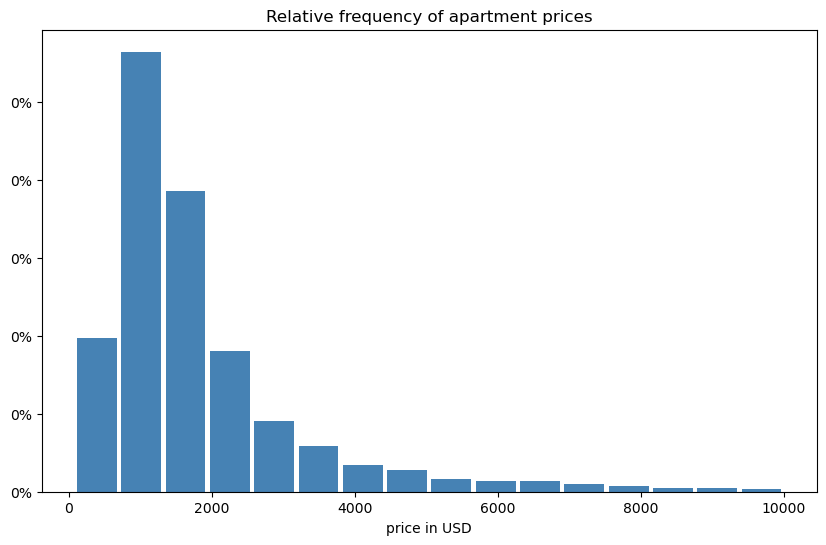

In [18]:
# relative frequencies with matplotlib

from matplotlib.ticker import PercentFormatter
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(df.price, bins = 16, density = True, rwidth = 0.9, color = 'steelblue')
ax.set_xlabel('price in USD')
# ax.grid()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=0.1, decimals = 0))
ax.set_title('Relative frequency of apartment prices')
plt.show()

In [19]:
#How is the average price changing in my district by `room_type`?
df.groupby(["room_type"]).agg(
    mean_price=("price", np.mean), 
    count = ('price', 'size')
).style.format({'mean_price': '{:,.2f}', 'count': '{:,.0f}'})

,mean_price,count
room_type,,
Entire home/apt,"1,946.84","13,737"
Hotel room,"2,029.62",231
Private room,"1,560.76","5,400"
Shared room,734.09,427


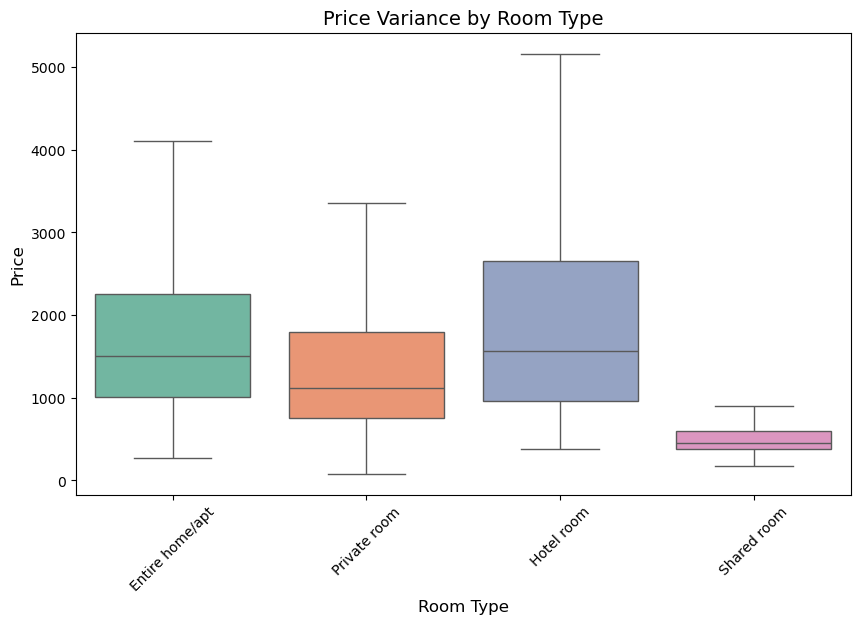

In [20]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create a box plot for price variance across room types
sns.boxplot(data=df, x="room_type", y="price", showfliers=False, palette="Set2")

# Add labels and title
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Price Variance by Room Type", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [21]:
# Work only with Entire home/apt, Private room, because other 2 types have not so much data
df = df[df["room_type"].isin(["Entire home/apt", "Private room"])]
df.drop(columns=["property_type"], inplace=True)  

# Keep only "Entire home/apt" and "Private room" listings
Sg = Sg[Sg["room_type"].isin(["Entire home/apt", "Private room"])]
Bg = Bg[Bg["room_type"].isin(["Entire home/apt", "Private room"])]

# Drop the "property_type" column
Sg.drop(columns=["property_type"], inplace=True, errors="ignore")
Bg.drop(columns=["property_type"], inplace=True, errors="ignore")

In [22]:
column_list = df.columns.tolist()
print(column_list)

['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calcu

In [23]:
# Set a fixed reference date
reference_date = pd.Timestamp("2024-09-25")

# Convert host_since to datetime
df["host_since"] = pd.to_datetime(df["host_since"])

# Calculate days since the host joined
df["days_since_host"] = (reference_date - df["host_since"]).dt.days

# Drop the original column
df.drop(columns=["host_since"], inplace=True)


# Set a fixed reference date
reference_date_sg = pd.Timestamp("2024-09-26")
reference_date_bg = pd.Timestamp("2024-12-25")

# Convert host_since to datetime
Sg["host_since"] = pd.to_datetime(Sg["host_since"])
Bg["host_since"] = pd.to_datetime(Bg["host_since"])

# Calculate days since the host joined
Sg["days_since_host"] = (reference_date_sg - Sg["host_since"]).dt.days
Bg["days_since_host"] = (reference_date_bg - Bg["host_since"]).dt.days

# Drop the original column
Sg.drop(columns=["host_since"], inplace=True)
Bg.drop(columns=["host_since"], inplace=True)

# Print to verify
print(Sg[["days_since_host"]].head())
print(Bg[["days_since_host"]].head())


   days_since_host
0             4690
1             4690
2             4664
3             4690
4             4690
   days_since_host
1             5234
2             5185
4             4988
7             4935
8             4884


In [24]:
!pip install geopy


In [25]:
from geopy.distance import geodesic

# Define Bangkok city center coordinates
bangkok_center = (13.7465, 100.5326)  # Latitude, Longitude

# Function to calculate distance from Bangkok city center
def calculate_distance(lat, lon, center=bangkok_center):
    return geodesic((lat, lon), center).km  # Distance in km

# Apply function to dataset
df["city_center_distance"] = df.apply(lambda row: calculate_distance(row["latitude"], row["longitude"]), axis=1)

# Define city center coordinates
bangkok_center = (13.7465, 100.5326)  # Bangkok Latitude, Longitude
singapore_center = (1.3521, 103.8198)  # Singapore Latitude, Longitude

# Function to calculate distance from a given city center
def calculate_distance(lat, lon, center=bangkok_center):
    return geodesic((lat, lon), center).km  # Distance in km

# Apply function to Singapore dataset (distance from Singapore center)
Sg["city_center_distance"] = Sg.apply(lambda row: calculate_distance(row["latitude"], row["longitude"], center=singapore_center), axis=1)

# Apply function to Bangkok dataset (distance from Bangkok center)
Bg["city_center_distance"] = Bg.apply(lambda row: calculate_distance(row["latitude"], row["longitude"], center=bangkok_center), axis=1)

# Check new column
print(Sg[["latitude", "longitude", "city_center_distance"]].head())
print(Bg[["latitude", "longitude", "city_center_distance"]].head())

# Check new column
df[["latitude", "longitude", "city_center_distance"]].head()


   latitude  longitude  city_center_distance
0   1.28986  103.80948              6.977355
1   1.28883  103.81113              7.062296
2   1.31142  103.83924              4.991421
3   1.28828  103.81020              7.137304
4   1.28636  103.81138              7.329341
   latitude  longitude  city_center_distance
1  13.92726  100.58529             20.794314
2  13.71934  100.51760              3.414890
4  13.73378  100.56303              3.579395
7  13.74464  100.55784              2.737497
8  13.70169  100.59770              8.611525


,latitude,longitude,city_center_distance
0,13.75983,100.54134,1.751698
3,13.78823,100.57256,6.323741
4,13.68556,100.49535,7.854388
5,13.71934,100.51760,3.414890
8,13.80956,100.56378,7.748805


In [26]:
print(df["accommodates"].value_counts().sort_index())

accommodates
1       421
2     11233
3      2183
4      2859
5       627
6       849
7       138
8       327
9        68
10      141
11       31
12      106
13       10
14       38
15       16
16       90
Name: count, dtype: int64


In [27]:
# Keep only listings where accommodates < 8
df = df[df["accommodates"] < 8]
# Keep only listings where accommodates < 8
Sg = Sg[Sg["accommodates"] < 8]
Bg = Bg[Bg["accommodates"] < 8]

# Verify the filter worked
print(df["accommodates"].value_counts().sort_index())


accommodates
1      421
2    11233
3     2183
4     2859
5      627
6      849
7      138
Name: count, dtype: int64


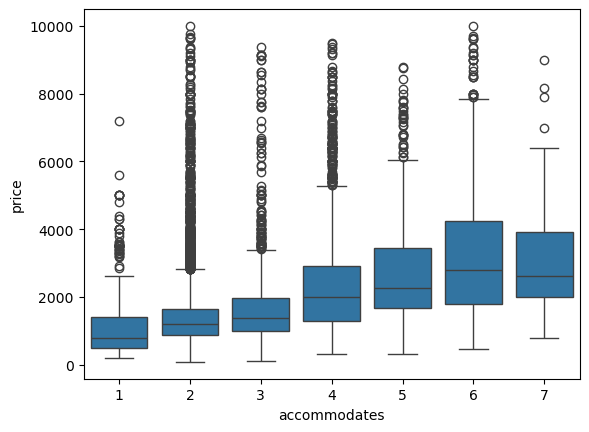

In [28]:
sns.boxplot(data = df, x = 'accommodates', y = 'price', orient = 'v')
plt.show()

In [29]:
column_list = df.columns.tolist()
print(column_list)


['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_lis

In [30]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
host_response_time,18310,5,within an hour,13661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,18310.0,NaN,NaN,NaN,0.950178,0.0,1.0,1.0,1.0,1.0,0.177782
host_acceptance_rate,18310.0,NaN,NaN,NaN,0.888692,0.0,0.9,0.99,1.0,1.0,0.215634
host_is_superhost,18310,2,True,17328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,18310.0,NaN,NaN,NaN,40.216166,0.0,3.0,10.0,42.0,1061.0,94.984922
host_total_listings_count,18310.0,NaN,NaN,NaN,50.994375,0.0,4.0,13.0,51.0,2084.0,118.115391
host_verifications,18310,7,"['email', 'phone']",13252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_has_profile_pic,18310,2,t,17826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,18310,2,t,18149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,18310,510,Unknown,11214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def price_diff_by_variables(df, factor_var, dummy_var, factor_lab, dummy_lab):
    # Calculate statistics same way as before
    stats = df.groupby([factor_var, dummy_var]).agg(
        Mean=("price", np.mean), 
        sd=("price", np.std), 
        size=("price", "size")
    )
    stats["se"] = stats["sd"] / stats["size"] ** (1/2)
    stats["Mean_l"] = stats["Mean"] - (1.96 * stats["se"])
    stats["Mean_u"] = stats["Mean"] + (1.96 * stats["se"])
    stats = stats.drop(["sd", "size"], axis=1).reset_index()

    # Create the plot using seaborn
    # plt.figure(figsize=(10, 6))
    plt.figure()
    
    # Create bar plot
    ax = sns.barplot(
        data=stats,
        x=stats.columns[0],
        y='Mean',
        hue=stats.columns[1],
        palette=['indianred', 'steelblue'],
        ci=None
    )

    # Add error bars
    for i, group in enumerate(stats[stats.columns[1]].unique()):
        group_data = stats[stats[stats.columns[1]] == group]
        x = np.arange(len(group_data))
        
        # Adjust x positions for dodge effect
        if i == 1:
            x = x + 0.2
        else:
            x = x - 0.2
            
        plt.errorbar(
            x=x, 
            y=group_data['Mean'],
            yerr=[(group_data['Mean'] - group_data['Mean_l']), 
                  (group_data['Mean_u'] - group_data['Mean'])],
            fmt='none',
            color='black',
            capsize=3
        )

    # Customize the plot
    plt.xlabel(factor_lab)
    plt.ylabel('Mean Price')
    
    # Customize legend
    plt.legend(
        title=dummy_lab,
        bbox_to_anchor=(0.5, 1.15),
        loc='center',
        ncol=2,
        fontsize=10,
        title_fontsize=10
    )
    
    # Remove grid
    ax.grid(False)
    plt.show()
    
    return plt


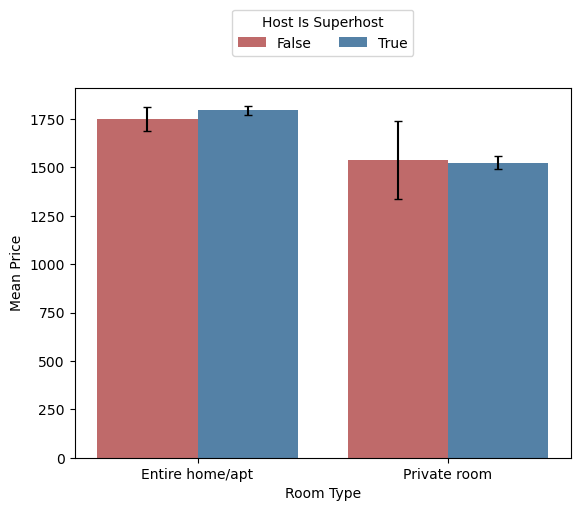

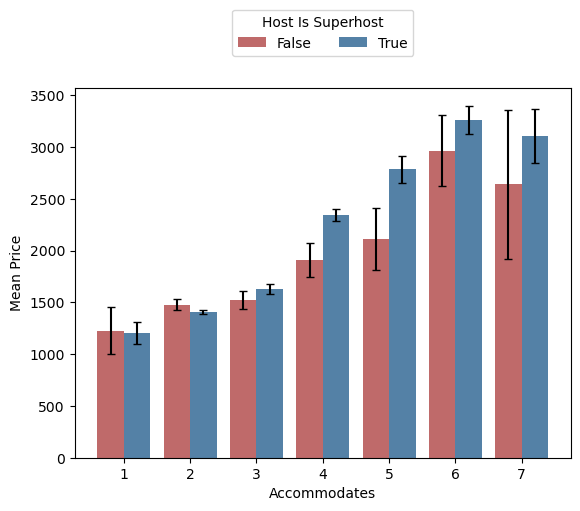

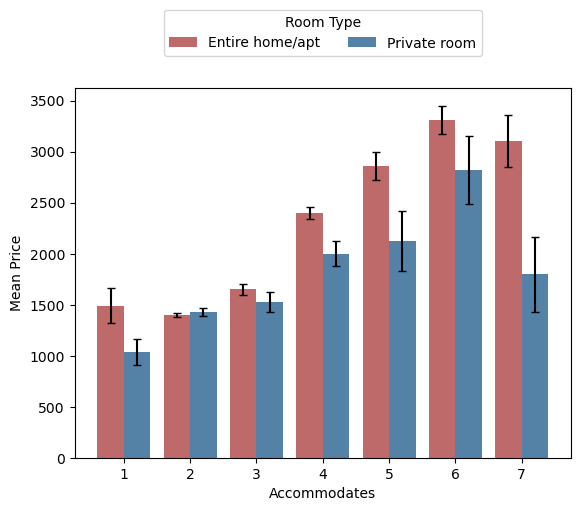

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [32]:
# Host & Listing Quality Interactions
price_diff_by_variables(df, "room_type", "host_is_superhost", "Room Type", "Host Is Superhost")
price_diff_by_variables(df, "accommodates", "host_is_superhost", "Accommodates", "Host Is Superhost")
# Property & Room Characteristics
price_diff_by_variables(df, "accommodates", "room_type", "Accommodates", "Room Type")

In [33]:
df.price.describe().map('{:,.2f}'.format)

count    18,310.00
mean      1,714.58
std       1,273.54
min          83.00
25%         949.00
50%       1,368.00
75%       2,000.00
max       9,999.00
Name: price, dtype: object

In [34]:
# How are extreme prices distributed?
df.price.quantile([0.5, 0.75, 0.8, 0.9, 0.95, 0.99, 0.995]).map('{:,.2f}'.format)

0.500    1,368.00
0.750    2,000.00
0.800    2,250.00
0.900    3,096.00
0.950    4,209.00
0.990    7,142.73
0.995    8,000.00
Name: price, dtype: object

In [35]:
# We pick USD 7000, above which all observations are excluded in the charts below.
df=df[df.price<7000]
print(len(df))

# Keep only listings where price < 7000
Sg = Sg[Sg["price"] < 7000]
Bg = Bg[Bg["price"] < 7000]

18096


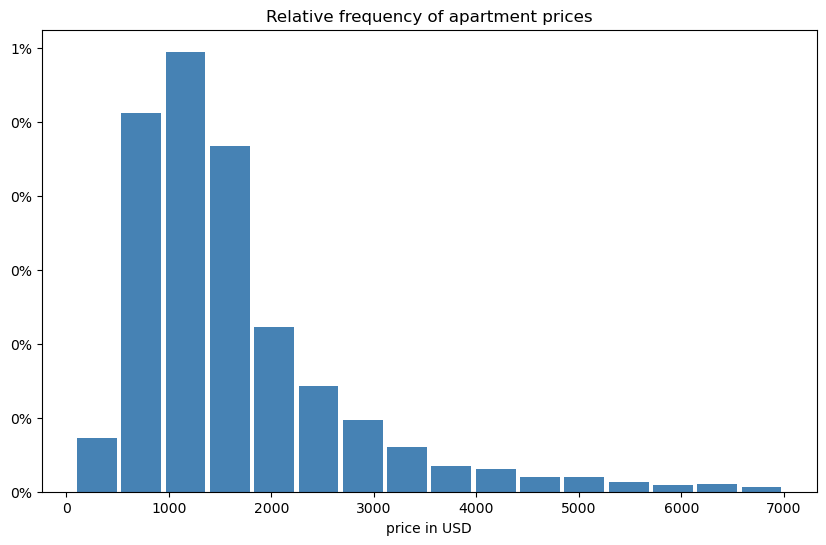

In [36]:
# relative frequencies with matplotlib

from matplotlib.ticker import PercentFormatter
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(df.price, bins = 16, density = True, rwidth = 0.9, color = 'steelblue')
ax.set_xlabel('price in USD')
# ax.grid()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=0.1, decimals = 0))
ax.set_title('Relative frequency of apartment prices')
plt.show()

In [37]:
# need to do some interaction terms later one

In [38]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_c

In [39]:
import ast
import re

# Convert the amenities column from string representation of lists to actual lists
df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
Sg['amenities'] = Sg['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
Bg['amenities'] = Bg['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Flatten the list of amenities and count occurrences
all_amenities = df['amenities'].explode().value_counts()

# Select the top 50 most common amenities
top_50_amenities = all_amenities.head(50).index.tolist()

# Function to clean column names
def clean_column_name(name):
    name = name.lower().strip()  # Convert to lowercase and strip spaces
    name = re.sub(r"[^\w\s]", "", name)  # Remove special characters except spaces
    name = name.replace(" ", "_")  # Replace spaces with underscores
    return f"amenity_{name}"

# Clean the top 50 amenities names
cleaned_top_50_amenities = [clean_column_name(amenity) for amenity in top_50_amenities]

# Create binary columns for the top 50 amenities
for clean_name, original_name in zip(cleaned_top_50_amenities, top_50_amenities):
    df[clean_name] = df['amenities'].apply(lambda x: 1 if original_name in x else 0)
    Sg[clean_name] = Sg['amenities'].apply(lambda x: 1 if original_name in x else 0)
    Bg[clean_name] = Bg['amenities'].apply(lambda x: 1 if original_name in x else 0)
    
# Drop the original amenities column
df.drop(columns=['amenities'], inplace=True)
Sg.drop(columns=['amenities'], inplace=True)
Bg.drop(columns=['amenities'], inplace=True)

# Extract all cleaned column names
amenities_clean = list(df.filter(regex="^amenity_.*"))
amenities_clean_Sg = list(Sg.filter(regex="^amenity_.*"))
amenities_clean_Bg = list(Bg.filter(regex="^amenity_.*"))

# Display the cleaned top 50 amenities
print("Extracted Cleaned Top 50 Amenity Columns:", amenities_clean)


# Define Interaction Groups
X1 = (
    "room_type * host_is_superhost",
    "room_type * has_availability"
)

X2 = (
    "host_response_time * host_is_superhost",
    "host_response_time * instant_bookable",
    "host_is_superhost * instant_bookable"
)

# Ensure X3 is correctly formatted using cleaned column names
X3 = "(room_type + host_is_superhost + has_availability + instant_bookable) * (" + " + ".join(df.filter(regex="^amenity_.*").columns) + ")"

# Display the interactions
print("X1:", X1)
print("X2:", X2)
print("X3:", X3)

# Add polynomial transformations
df["accommodates2"] = df["accommodates"] ** 2
df["days_since_host2"] = df["days_since_host"] ** 2
df["days_since_host3"] = df["days_since_host"] ** 3

# Add polynomial transformations using the same approach as df
Sg["accommodates2"] = Sg["accommodates"] ** 2
Sg["days_since_host2"] = Sg["days_since_host"] ** 2
Sg["days_since_host3"] = Sg["days_since_host"] ** 3

Bg["accommodates2"] = Bg["accommodates"] ** 2
Bg["days_since_host2"] = Bg["days_since_host"] ** 2
Bg["days_since_host3"] = Bg["days_since_host"] ** 3



Extracted Cleaned Top 50 Amenity Columns: ['amenity_wifi', 'amenity_air_conditioning', 'amenity_kitchen', 'amenity_smoke_alarm', 'amenity_hair_dryer', 'amenity_hangers', 'amenity_essentials', 'amenity_tv', 'amenity_dedicated_workspace', 'amenity_hot_water', 'amenity_shampoo', 'amenity_washer', 'amenity_fire_extinguisher', 'amenity_refrigerator', 'amenity_dishes_and_silverware', 'amenity_free_parking_on_premises', 'amenity_elevator', 'amenity_microwave', 'amenity_iron', 'amenity_bed_linens', 'amenity_self_checkin', 'amenity_long_term_stays_allowed', 'amenity_shower_gel', 'amenity_cooking_basics', 'amenity_hot_water_kettle', 'amenity_pool', 'amenity_carbon_monoxide_alarm', 'amenity_exercise_equipment', 'amenity_dining_table', 'amenity_roomdarkening_shades', 'amenity_first_aid_kit', 'amenity_drying_rack_for_clothing', 'amenity_exterior_security_cameras_on_property', 'amenity_cleaning_products', 'amenity_luggage_dropoff_allowed', 'amenity_body_soap', 'amenity_gym', 'amenity_extra_pillows_a

In [40]:
# Convert binary columns ('t' -> 1, 'f' -> 0)
binary_columns = ["host_has_profile_pic", "host_identity_verified", "instant_bookable"]

for col in binary_columns:
    df[col] = df[col].map({"t": 1, "f": 0}).astype(int)  # Convert to int for consistency

# Map 'host_response_time' to ordinal values
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4
}
df["host_response_time"] = df["host_response_time"].map(response_time_mapping).fillna(5)  # Unknown as 5

# Convert 'room_type' into a binary variable
df["room_type"] = (df["room_type"] == "Private room").astype(int)  # 1 if Private room, 0 if Entire home/apt

# Drop unnecessary columns
df.drop(columns=["host_verifications", "neighbourhood", "neighbourhood_cleansed"], inplace=True)

for col in binary_columns:
    Sg[col] = Sg[col].map({"t": 1, "f": 0}).astype(int)
    Bg[col] = Bg[col].map({"t": 1, "f": 0}).astype(int)

# Map 'host_response_time' to ordinal values
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4
}

Sg["host_response_time"] = Sg["host_response_time"].map(response_time_mapping).fillna(5)  # Unknown as 5
Bg["host_response_time"] = Bg["host_response_time"].map(response_time_mapping).fillna(5)

# Convert 'room_type' into a binary variable
Sg["room_type"] = (Sg["room_type"] == "Private room").astype(int)  # 1 if Private room, 0 if Entire home/apt
Bg["room_type"] = (Bg["room_type"] == "Private room").astype(int)

# Drop unnecessary columns
drop_columns = ["host_verifications", "neighbourhood", "neighbourhood_cleansed"]
Sg.drop(columns=drop_columns, inplace=True, errors='ignore')
Bg.drop(columns=drop_columns, inplace=True, errors='ignore')

# Display to verify changes
print(df["room_type"].value_counts())  # Check if encoding worked correctly
print(df.dtypes)  # Verify data types


room_type
0    12849
1     5247
Name: count, dtype: int64
host_response_time                  float64
host_response_rate                  float64
host_acceptance_rate                float64
host_is_superhost                      bool
host_listings_count                   int64
                                     ...   
amenity_host_greets_you               int64
amenity_private_patio_or_balcony      int64
accommodates2                         int64
days_since_host2                      int64
days_since_host3                      int64
Length: 104, dtype: object


In [41]:
column_list = df.columns.tolist()
print(column_list)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_

In [42]:
# Basic level variables (essential listing characteristics)
basic_lev = (
    "accommodates",  # Number of guests
    "beds",  # Number of beds
    "room_type",  # Type of room
    "city_center_distance",  # Distance from city center
)

# Additional core features related to property and availability
basic_add = (
    "bathrooms",  # Number of bathrooms
    "minimum_nights",  # Minimum stay requirement
    "maximum_nights",  # Maximum stay allowed
)

# Reviews and ratings (host & guest experience)
reviews = (
    "number_of_reviews",  # Total number of reviews
    "review_scores_rating",  # Overall review rating
    "flag_no_reviews",  # Indicator for missing reviews
)

# Host-related variables (host quality & engagement)
host_features = (
    "host_is_superhost",  # Whether the host is a Superhost
    "host_has_profile_pic",  # Whether the host has a profile picture
    "host_identity_verified",  # Whether the host is verified
    "host_response_time",  # Response speed category
    "host_response_rate",  # Response rate percentage
    "host_acceptance_rate",  # Acceptance rate percentage
)

# Availability & Booking Features
availability_features = (
    "has_availability",  # Whether the listing is available
    "availability_30",  # Availability in the next 30 days
    "availability_60",  # Availability in the next 60 days
    "availability_90",  # Availability in the next 90 days
    "availability_365",  # Availability in the next year
    "instant_bookable",  # Whether instant booking is available
)

# Property and Room Characteristics
property_features = (
    "calculated_host_listings_count",  # Total number of listings by the host
    "calculated_host_listings_count_entire_homes",  # Entire home listings by the host
    "calculated_host_listings_count_private_rooms",  # Private room listings by the host
    "calculated_host_listings_count_shared_rooms",  # Shared room listings by the host
)

poly_lev = (
    "accommodates2",  # n_accommodates2
    "days_since_host2",  # n_days_since2
    "days_since_host3"  # n_days_since3
)


In [43]:
# Model 1: Basic Model
modellev1 = "~ accommodates"

# Model 2: Add basic listing characteristics
modellev2 = "~" + " + ".join(basic_lev)

# Model 3: Add property attributes and review metrics
modellev3 = (
    "~" + " + ".join(basic_lev) + " + " 
    + " + ".join(basic_add) + " + " 
    + " + ".join(reviews)
)

# Model 4: Add polynomial transformations
modellev4 = (
    "~" + " + ".join(basic_lev) + " + " 
    + " + ".join(basic_add) + " + " 
    + " + ".join(reviews) + " + " 
    + " + ".join(poly_lev)
)

# Model 5: Add interaction terms (X1)
modellev5 = (
    "~" + " + ".join(basic_lev) + " + " 
    + " + ".join(basic_add) + " + " 
    + " + ".join(reviews) + " + " 
    + " + ".join(poly_lev) + " + " 
    + " + ".join(X1)
)

# Model 6: Add more interactions (X2) and property features
modellev6 = (
    "~" + " + ".join(basic_lev) + " + " 
    + " + ".join(basic_add) + " + " 
    + " + ".join(reviews) + " + " 
    + " + ".join(poly_lev) + " + " 
    + " + ".join(X1) + " + " 
    + " + ".join(X2) + " + " 
    + " + ".join(property_features)
)

# Model 7: Add all features up to top 100 amenities
modellev7 = (
    "~" + " + ".join(basic_lev) + " + "
    + " + ".join(basic_add) + " + "
    + " + ".join(reviews) + " + "
    + " + ".join(poly_lev) + " + "
    + " + ".join(X1) + " + "
    + " + ".join(X2) + " + "
    + " + ".join(property_features) + " + "
    + " + ".join(host_features) + " + "
    + " + ".join(availability_features) + " + "
    + " + ".join(amenities_clean)  # <-- FIXED: Using cleaned amenities
)

# Model 8: Add interactions with top 100 amenities
modellev8 = (
    "~" + " + ".join(basic_lev) + " + "
    + " + ".join(basic_add) + " + "
    + " + ".join(reviews) + " + "
    + " + ".join(poly_lev) + " + "
    + " + ".join(X1) + " + "
    + " + ".join(X2) + " + "
    + " + ".join(property_features) + " + "
    + " + ".join(host_features) + " + "
    + " + ".join(availability_features) + " + "
    + " + ".join(amenities_clean) + " + "
    + " + ".join(["(room_type + host_is_superhost + has_availability + instant_bookable) * (" + " + ".join(amenities_clean) + ")"])
)


# Print model formulas for verification
models = [modellev1, modellev2, modellev3, modellev4, modellev5, modellev6, modellev7, modellev8]
for i, model in enumerate(models, 1):
    print(f"Model {i}: {model}\n")





Model 1: ~ accommodates

Model 2: ~accommodates + beds + room_type + city_center_distance

Model 3: ~accommodates + beds + room_type + city_center_distance + bathrooms + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + flag_no_reviews

Model 4: ~accommodates + beds + room_type + city_center_distance + bathrooms + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + flag_no_reviews + accommodates2 + days_since_host2 + days_since_host3

Model 5: ~accommodates + beds + room_type + city_center_distance + bathrooms + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + flag_no_reviews + accommodates2 + days_since_host2 + days_since_host3 + room_type * host_is_superhost + room_type * has_availability

Model 6: ~accommodates + beds + room_type + city_center_distance + bathrooms + minimum_nights + maximum_nights + number_of_reviews + review_scores_rating + flag_no_reviews + accommodates2 + days_since_host2 + days_since

In [44]:
smp_size = round(0.2 * df.shape[0])-1
smp_size

3618

In [45]:
# Set the seed to make results reproducable
np.random.seed(20250217)

In [46]:
from sklearn.model_selection import train_test_split
df_work, df_holdout=train_test_split(df, test_size=smp_size)
df_work.shape

(14478, 104)

In [47]:
n_folds=5
from sklearn.model_selection import KFold
from statsmodels.tools.eval_measures import mse,rmse
k = KFold(n_splits=n_folds, shuffle=False, random_state=None)
def cv_reg(formula, df, kfold, testdf, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []
    rmse_list_test = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(df):
        df_train, df_test = df.iloc[train_index, :], df.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data = df_train).fit()
        else:
            model = smf.ols(formula, data = df_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(df_test)]
        rsquared += [model.rsquared]

        rmse_tr = pd.concat(
            [df_train["price"], model.predict(df_train)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_tr = rmse_tr[~rmse_tr.isna().any(axis=1)]

        rmse_te = pd.concat(
            [df_test["price"], model.predict(df_test)],
            axis=1,
            keys=["price", "predicted"],
        )
        rmse_te = rmse_te[~rmse_te.isna().any(axis=1)]

        rmse_list += [rmse(rmse_tr["price"], rmse_tr["predicted"], axis=0)]
        rmse_list_test += [rmse(rmse_te["price"], rmse_te["predicted"], axis=0)]
    nvars = model.df_model

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
        "rmse_test": rmse_list_test,
        "nvars": nvars,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cvlist))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [48]:
import re

# Function to clean column names
def clean_column_name(name):
    name = str(name).strip().lower()  # Convert to lowercase and remove spaces
    name = re.sub(r"[^\w\s]", "", name)  # Remove special characters
    name = name.replace(" ", "_")  # Replace spaces with underscores
    return name

# Apply the cleaning function to all column names
df.columns = [clean_column_name(col) for col in df.columns]


In [49]:
cv_list = []
for i in [
    modellev1,
    modellev2,
    modellev3,
    modellev4,
    modellev5,
    modellev6,
    modellev7,
    modellev8
]:
    cv_list.append(cv_reg("price " + i, df, k, "HC0"))  # Fix formula concatenation


In [50]:
column_list = df.columns.tolist()
print(column_list)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_

In [51]:
summarize_cv(cv_list).map('{:,.3f}'.format)

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8
Fold1,970.899,941.148,914.012,910.720,910.653,902.080,850.903,821.490
Fold2,953.081,929.251,899.559,897.205,896.875,888.351,840.115,815.884
Fold3,972.726,946.755,917.324,915.355,915.178,906.444,859.088,832.514
Fold4,987.834,962.231,929.661,927.443,927.156,916.242,866.694,839.670
Fold5,959.203,934.403,903.396,900.618,900.320,889.713,843.355,816.185
Average,968.749,942.758,912.790,910.268,910.036,900.566,852.031,825.149


In [52]:
# RMSE training vs test graph

rmse_levels = {"nvars": [], "var": [], "value": []}
for i in range(0, 8):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Training")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse"]).mean())
for i in range(0, 8):
    rmse_levels["nvars"].append(int(cv_list[i]["nvars"]))
    rmse_levels["var"].append("RMSE Test")
    rmse_levels["value"].append(pd.Series(cv_list[i]["rmse_test"]).mean())
df_rmse_levels = pd.DataFrame.from_dict(rmse_levels)
df_rmse_levels["nvars2"] = df_rmse_levels["nvars"] + 1

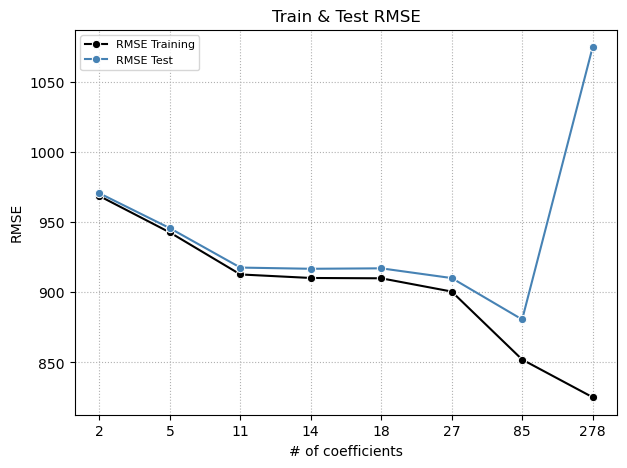

In [53]:
plt.figure(figsize=(7,5))
ax = sns.lineplot(
    x = [str(x) for x in df_rmse_levels['nvars2']], 
    y = df_rmse_levels['value'], 
    hue = df_rmse_levels['var'], marker = 'o',
    palette = ['k', 'steelblue']
)
ax.set_title('Train & Test RMSE')
ax.set_ylabel('RMSE')
ax.set_xlabel('# of coefficients')
ax.legend(fontsize = 8, title = None)
ax.grid(linestyle = ':')
plt.show();

In [54]:
# LASSO

In [55]:
# Define Model 7 variable interaction dynamically
vars_model_7 = (
    "(room_type + host_is_superhost + has_availability + instant_bookable) * ("
    + " + ".join(amenities_clean)  # Uses all amenities from cleaned list
    + ")"
)

# Define Model 8 using Model 7 and additional variables
vars_model_8 = (
    modellev8 + " + "
    + "(room_type + host_is_superhost + has_availability + instant_bookable) * ("
    + " + ".join(amenities_clean)  # Uses all amenities in interactions
    + ")"
)

# Print results for verification
print("Model 7 Variables:\n", vars_model_7)
print("\nModel 8 Variables:\n", vars_model_8)


Model 7 Variables:
 (room_type + host_is_superhost + has_availability + instant_bookable) * (amenity_wifi + amenity_air_conditioning + amenity_kitchen + amenity_smoke_alarm + amenity_hair_dryer + amenity_hangers + amenity_essentials + amenity_tv + amenity_dedicated_workspace + amenity_hot_water + amenity_shampoo + amenity_washer + amenity_fire_extinguisher + amenity_refrigerator + amenity_dishes_and_silverware + amenity_free_parking_on_premises + amenity_elevator + amenity_microwave + amenity_iron + amenity_bed_linens + amenity_self_checkin + amenity_long_term_stays_allowed + amenity_shower_gel + amenity_cooking_basics + amenity_hot_water_kettle + amenity_pool + amenity_carbon_monoxide_alarm + amenity_exercise_equipment + amenity_dining_table + amenity_roomdarkening_shades + amenity_first_aid_kit + amenity_drying_rack_for_clothing + amenity_exterior_security_cameras_on_property + amenity_cleaning_products + amenity_luggage_dropoff_allowed + amenity_body_soap + amenity_gym + amenity_ext

In [56]:
from sklearn.linear_model import Lasso
import patsy
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
y, X = patsy.dmatrices("price" + vars_model_8, df)

In [57]:
y

DesignMatrix with shape (18096, 1)
  price
   1793
   1286
   1467
   1350
   1369
   5347
   1304
   1190
   1200
   1090
   1290
   1630
   1050
   2119
   1630
    815
    800
   1728
    815
    771
   1136
   3521
    800
    815
    700
    782
    750
    850
    850
   1269
  [18066 rows omitted]
  Terms:
    'price' (column 0)
  (to view full data, use np.asarray(this_obj))

In [58]:
X.shape

(18096, 285)

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=smp_size, random_state=10
)

lambdas = [i/100 for i in range(5, 100,5)]

train_r_squared = np.zeros(len(lambdas))
test_r_squared = np.zeros(len(lambdas))

pred_num = X.shape[1]
coeff_a = np.zeros((len(lambdas), pred_num))

Run:  0, lambda: 0.05, start: 2025-03-02 22:43:23
Run:  1, lambda: 0.10, start: 2025-03-02 22:43:35
Run:  2, lambda: 0.15, start: 2025-03-02 22:43:47
Run:  3, lambda: 0.20, start: 2025-03-02 22:43:58
Run:  4, lambda: 0.25, start: 2025-03-02 22:44:09
Run:  5, lambda: 0.30, start: 2025-03-02 22:44:20
Run:  6, lambda: 0.35, start: 2025-03-02 22:44:31
Run:  7, lambda: 0.40, start: 2025-03-02 22:44:42
Run:  8, lambda: 0.45, start: 2025-03-02 22:44:52
Run:  9, lambda: 0.50, start: 2025-03-02 22:45:03
Run: 10, lambda: 0.55, start: 2025-03-02 22:45:14
Run: 11, lambda: 0.60, start: 2025-03-02 22:45:24
Run: 12, lambda: 0.65, start: 2025-03-02 22:45:35
Run: 13, lambda: 0.70, start: 2025-03-02 22:45:45
Run: 14, lambda: 0.75, start: 2025-03-02 22:45:56
Run: 15, lambda: 0.80, start: 2025-03-02 22:46:07
Run: 16, lambda: 0.85, start: 2025-03-02 22:46:18
Run: 17, lambda: 0.90, start: 2025-03-02 22:46:29
Run: 18, lambda: 0.95, start: 2025-03-02 22:46:40


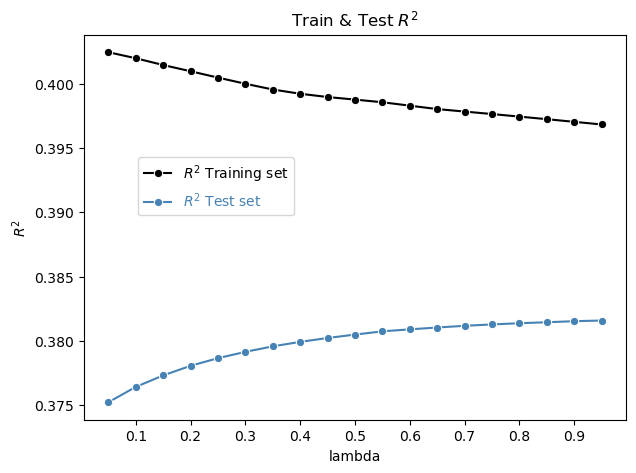

In [60]:
import datetime
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):
    print(f"Run: {str(ind).rjust(2)}, lambda: {i:.2f}, start: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    reg = Lasso(alpha = i, random_state= 20250217) # In Python, Lasso's lambda is called alpha. Why?
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=cv, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

r_squared_df = (
    pd.DataFrame(
        {
            "$R^2$ Test set": test_r_squared,
            "$R^2$ Training set": train_r_squared,
            "lambda": lambdas,
        }
    )
    .melt(id_vars=["lambda"])
)

r_squared_df["variable"] = r_squared_df["variable"].astype("category").cat.reorder_categories(
    ["$R^2$ Training set", "$R^2$ Test set"]
)

plt.figure(figsize=(7,5))
ax = sns.lineplot(
    data = r_squared_df, 
    x = 'lambda', y = 'value', hue = 'variable', 
    palette = ['k', 'steelblue'],
    marker = 'o'
)
ax.set_title('Train & Test $R^2$')
ax.set_ylabel('$R^2$')
ax.set_xlabel('lambda')
ax.set_xticks(lambdas[1::2])
ax.legend(fontsize = 10, title = None, labelcolor = ['k', 'steelblue'], loc='upper right', bbox_to_anchor=(0.4, 0.7))
plt.show();

In [61]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    38.158042
lambda        0.950000
Name: 18, dtype: float64

In [62]:
reg_best = Lasso(alpha = df_lam.loc[df_lam['R_squared'].idxmax()]['lambda'])
reg_best.fit(X_train, y_train)
reg_best.coef_[reg_best.coef_>0]
reg_best.get_params()

{'alpha': 0.95,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [63]:
from sklearn.metrics import mean_squared_error

print(f'{mean_squared_error(y_test, reg_best.predict(X_test)):,.2f}')

705,640.79


In [64]:
y,  X = patsy.dmatrices('price'+vars_model_8, df)
from sklearn.model_selection import GridSearchCV


In [65]:
%%time

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 20250217)

# define grid
grid = dict()
grid["alpha"] = np.arange(0.05, 1, 0.05)
# define search
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv = cv, verbose= 3) # control your output with the 'verbose' option
# perform the search
results = search.fit(X, y)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END .....................alpha=0.05;, score=-836.658 total time=   1.9s
[CV 2/5] END .....................alpha=0.05;, score=-848.953 total time=   2.0s
[CV 3/5] END .....................alpha=0.05;, score=-883.203 total time=   1.9s
[CV 4/5] END .....................alpha=0.05;, score=-830.394 total time=   1.9s
[CV 5/5] END .....................alpha=0.05;, score=-827.674 total time=   1.9s
[CV 1/5] END ......................alpha=0.1;, score=-836.467 total time=   1.8s
[CV 2/5] END ......................alpha=0.1;, score=-847.954 total time=   1.8s
[CV 3/5] END ......................alpha=0.1;, score=-882.477 total time=   1.8s
[CV 4/5] END ......................alpha=0.1;, score=-829.800 total time=   1.8s
[CV 5/5] END ......................alpha=0.1;, score=-827.394 total time=   1.8s
[CV 1/5] END ......alpha=0.15000000000000002;, score=-836.514 total time=   1.6s
[CV 2/5] END ......alpha=0.15000000000000002;, s

In [66]:
print(f'RMSE: {(results.best_score_ * -1):,.3f}')

RMSE: 844.059


In [67]:
results.cv_results_['rank_test_score']

array([19, 18, 13, 10,  7,  5,  3,  1,  2,  4,  6,  8,  9, 11, 12, 14, 15,
       16, 17])

In [68]:
results.best_estimator_

Lasso(alpha=0.4)

In [69]:
model3_level = smf.ols('price'+modellev3, data=df_work).fit(cov_type='HC0')
model7_level = smf.ols('price'+modellev7, data=df_work).fit(cov_type='HC0')

In [70]:
# look at holdout RMSE
model7_level_work_predictions = pd.concat(
    [df_work["price"], model7_level.predict(df_work)],
    axis=1,
    keys=["price", "predicted"],
)
model7_level_work_predictions = model7_level_work_predictions[~model7_level_work_predictions.isna().any(axis=1)]
model7_level_work_rmse = rmse(model7_level_work_predictions["price"], model7_level_work_predictions["predicted"], axis=0)
model7_level_holdout_predictions = pd.concat(
    [df_holdout["price"], model7_level.predict(df_holdout)],
    axis=1,
    keys=["price", "predicted"],
)
model7_level_holdout_predictions = model7_level_holdout_predictions[~model7_level_holdout_predictions.isna().any(axis=1)]
model7_level_holdout_rmse = rmse(model7_level_holdout_predictions["price"], model7_level_holdout_predictions["predicted"], axis=0)
print(
    f"RMSE work:{round(model7_level_work_rmse,2)}",
    "\t",
    f"RMSE holdout:{model7_level_holdout_rmse:.2f}",
)

RMSE work:856.17 	 RMSE holdout:851.95


In [71]:
### ML coding

In [72]:
column_list = df.columns.tolist()
print(column_list)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_

In [73]:
# Display column data types
df_dtypes = df.dtypes.to_frame(name="dtype")

# Identify non-numeric columns
non_numeric_columns = df_dtypes[df_dtypes["dtype"] == "object"]

# Display data types
print(df_dtypes)

# Print non-numeric columns
if not non_numeric_columns.empty:
    print("\n❌ Non-numeric columns found:")
    print(non_numeric_columns)
else:
    print("\n✅ All columns are numeric.")

                                    dtype
host_response_time                float64
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                    bool
host_listings_count                 int64
...                                   ...
amenity_host_greets_you             int64
amenity_private_patio_or_balcony    int64
accommodates2                       int64
days_since_host2                    int64
days_since_host3                    int64

[104 rows x 1 columns]

✅ All columns are numeric.


In [74]:
# Convert host rates from percentages to numeric (0-1 scale)
for df_tmp in [Sg, Bg]:
    if df_tmp["host_acceptance_rate"].dtype == object:
        df_tmp["host_acceptance_rate"] = df_tmp["host_acceptance_rate"].str.rstrip("%").astype(float) / 100
    if df_tmp["host_response_rate"].dtype == object:
        df_tmp["host_response_rate"] = df_tmp["host_response_rate"].str.rstrip("%").astype(float) / 100

    # Fill missing values with the median from df to prevent data leakage
    df_tmp["host_acceptance_rate"] = df_tmp["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median())
    df_tmp["host_response_rate"] = df_tmp["host_response_rate"].fillna(df["host_response_rate"].median())

# Display column data types for Sg and Bg
Sg_dtypes = Sg.dtypes.to_frame(name="dtype")
Bg_dtypes = Bg.dtypes.to_frame(name="dtype")

# Identify non-numeric columns
Sg_non_numeric_columns = Sg_dtypes[Sg_dtypes["dtype"] == "object"]
Bg_non_numeric_columns = Bg_dtypes[Bg_dtypes["dtype"] == "object"]

# Display data types
print("Sg Data Types:\n", Sg_dtypes)
print("\nBg Data Types:\n", Bg_dtypes)

# Print non-numeric columns
if not Sg_non_numeric_columns.empty:
    print("\n❌ Non-numeric columns found in Sg:")
    print(Sg_non_numeric_columns)
else:
    print("\n✅ All columns in Sg are numeric.")

if not Bg_non_numeric_columns.empty:
    print("\n❌ Non-numeric columns found in Bg:")
    print(Bg_non_numeric_columns)
else:
    print("\n✅ All columns in Bg are numeric.")


Sg Data Types:
                                     dtype
host_response_time                float64
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                    bool
host_listings_count                 int64
...                                   ...
amenity_host_greets_you             int64
amenity_private_patio_or_balcony    int64
accommodates2                       int64
days_since_host2                    int64
days_since_host3                    int64

[104 rows x 1 columns]

Bg Data Types:
                                     dtype
host_response_time                float64
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                    bool
host_listings_count               float64
...                                   ...
amenity_host_greets_you             int64
amenity_private_patio_or_balcony    int64
accommodates2                       int64
days_since_host2   

In [75]:
column_list = df.columns.tolist()
print(column_list)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_

In [76]:
# Predictors 1: Basic Listing Characteristics
predictors_1 = list(basic_lev)

# Predictors 2: Add Reviews and Amenities
predictors_2 = (
    list(basic_lev)
    + list(basic_add)
    + list(reviews)
    + list(amenities_clean)  # Use cleaned amenity names
)

# Predictors E: Add Interactions and Other Features
predictors_E = (
    list(basic_lev)
    + list(basic_add)
    + list(reviews)
    + list(host_features)
    + list(availability_features)
    + list(property_features)
    + list(poly_lev)
    + list(amenities_clean)  # Use cleaned amenity names
    + list(X1)
    + list(X2)
)


In [77]:
df_train, df_holdout = train_test_split( df, train_size=0.7, random_state = 20250224)

In [78]:
df_train.shape, df_holdout.shape

((12667, 104), (5429, 104))

In [79]:
categorical_vars = [col for col in df_train.columns if col.startswith("room_type_")]

y, X = dmatrices(
    "price ~ " 
    + " + ".join(
        [
            f"C({var})" if var in ["room_type", "host_response_time", "instant_bookable"] + categorical_vars else var  
            for var in predictors_2 
        ]
    ),
    df_train,
)


In [80]:
import math
print('The theoretical recommended number of variables: {:.2f}.'.format(math.sqrt(len(X.design_info.column_names))))

The theoretical recommended number of variables: 7.81.


In [81]:
rfr = RandomForestRegressor(random_state = 20250224)

In [82]:
tune_grid = {"max_features": [4, 6, 8, 10], "min_samples_leaf": [5, 10, 15]}
rf_random = GridSearchCV(
    estimator = rfr,
    param_grid = tune_grid,
    cv = 5,
    scoring = "neg_root_mean_squared_error",
    verbose = 3,
)

In [83]:
%%time
rf_model = rf_random.fit(X, y.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_features=4, min_samples_leaf=5;, score=-801.299 total time=   0.6s
[CV 2/5] END max_features=4, min_samples_leaf=5;, score=-782.018 total time=   0.4s
[CV 3/5] END max_features=4, min_samples_leaf=5;, score=-825.515 total time=   0.4s
[CV 4/5] END max_features=4, min_samples_leaf=5;, score=-806.118 total time=   0.4s
[CV 5/5] END max_features=4, min_samples_leaf=5;, score=-804.257 total time=   0.4s
[CV 1/5] END max_features=4, min_samples_leaf=10;, score=-830.321 total time=   0.4s
[CV 2/5] END max_features=4, min_samples_leaf=10;, score=-812.324 total time=   0.3s
[CV 3/5] END max_features=4, min_samples_leaf=10;, score=-853.589 total time=   0.3s
[CV 4/5] END max_features=4, min_samples_leaf=10;, score=-831.368 total time=   0.3s
[CV 5/5] END max_features=4, min_samples_leaf=10;, score=-830.296 total time=   0.3s
[CV 1/5] END max_features=4, min_samples_leaf=15;, score=-846.110 total time=   0.3s
[CV 2/5] 

In [84]:
df_rf_model_cv_results = pd.DataFrame(rf_model.cv_results_)[[
    'param_max_features', 'param_min_samples_leaf', 'mean_test_score']]
df_rf_model_cv_results.columns = ['max features', 'min node size', 'RMSE']
df_rf_model_cv_results

,max features,min node size,RMSE
0,4,5,-803.841432
1,4,10,-831.579721
2,4,15,-847.193719
3,6,5,-777.852752
4,6,10,-805.384994
5,6,15,-819.887818
6,8,5,-765.869809
7,8,10,-792.979922
8,8,15,-807.304815
9,10,5,-757.427334


In [85]:
df_rf_model_cv_results.pivot(
    index = 'max features', 
    columns = 'min node size', 
    values = 'RMSE').round(2)*-1

min node size,5,10,15
max features,,,
4,803.84,831.58,847.19
6,777.85,805.38,819.89
8,765.87,792.98,807.30
10,757.43,783.75,797.52


In [86]:
rf_model.best_score_

-757.4273335498349

In [87]:
rf_model.best_params_

{'max_features': 10, 'min_samples_leaf': 5}

In [88]:
rf_model.best_estimator_

RandomForestRegressor(max_features=10, min_samples_leaf=5,
                      random_state=20250224)

In [89]:
y_h, X_h = dmatrices("price ~ " + " + ".join(predictors_2), df_holdout)
pred = rf_model.predict(X_h)
from statsmodels.tools.eval_measures import rmse
rmse(y_h, pred)
mean_squared_error(y_h, pred, squared= False)

883.0402208389803

In [90]:
rf_model.best_estimator_.feature_importances_

array([0.        , 0.01587594, 0.12142578, 0.07173207, 0.14540537,
       0.16761991, 0.03937058, 0.01346732, 0.03265362, 0.02587765,
       0.01181744, 0.00297337, 0.00387238, 0.01452086, 0.01491138,
       0.0050412 , 0.00585916, 0.00541176, 0.0116093 , 0.00758216,
       0.00464684, 0.00517821, 0.00879822, 0.00808665, 0.00590188,
       0.00489978, 0.0168447 , 0.00743162, 0.00466587, 0.00996439,
       0.00599127, 0.0070744 , 0.00741724, 0.00494837, 0.00792373,
       0.00555662, 0.01349964, 0.00870417, 0.00881009, 0.00579366,
       0.00624816, 0.01163688, 0.00485113, 0.00780037, 0.00508818,
       0.00829124, 0.00772734, 0.00859951, 0.00396793, 0.00619266,
       0.00476267, 0.00419904, 0.00570204, 0.00287903, 0.00472076,
       0.00291739, 0.00575748, 0.01369919, 0.00864431, 0.00388912,
       0.00326099])

In [91]:
pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)

,0
Intercept,0.000000
C(room_type)[T.1],0.015876
accommodates,0.121426
beds,0.071732
city_center_distance,0.145405
...,...
amenity_shared_gym_in_building,0.005757
amenity_building_staff,0.013699
amenity_conditioner,0.008644
amenity_host_greets_you,0.003889


In [92]:
df_var_imp = pd.DataFrame(
    rf_model.best_estimator_.feature_importances_, 
    X.design_info.column_names)\
    .reset_index()\
    .rename({"index": "variable", 0: "imp"}, axis=1)\
    .sort_values(by=["imp"], ascending=False)\
    .reset_index(drop = True)

df_var_imp['cumulative_imp'] = df_var_imp['imp'].cumsum()

In [93]:
df_var_imp.style.format({
    'imp': lambda x: f'{x:,.1%}',
    'cumulative_imp': lambda x: f'{x:,.1%}'})

,variable,imp,cumulative_imp
0,bathrooms,16.8%,16.8%
1,city_center_distance,14.5%,31.3%
2,accommodates,12.1%,43.4%
3,beds,7.2%,50.6%
4,minimum_nights,3.9%,54.6%
5,number_of_reviews,3.3%,57.8%
6,review_scores_rating,2.6%,60.4%
7,amenity_free_parking_on_premises,1.7%,62.1%
8,C(room_type)[T.1],1.6%,63.7%
9,amenity_smoke_alarm,1.5%,65.2%


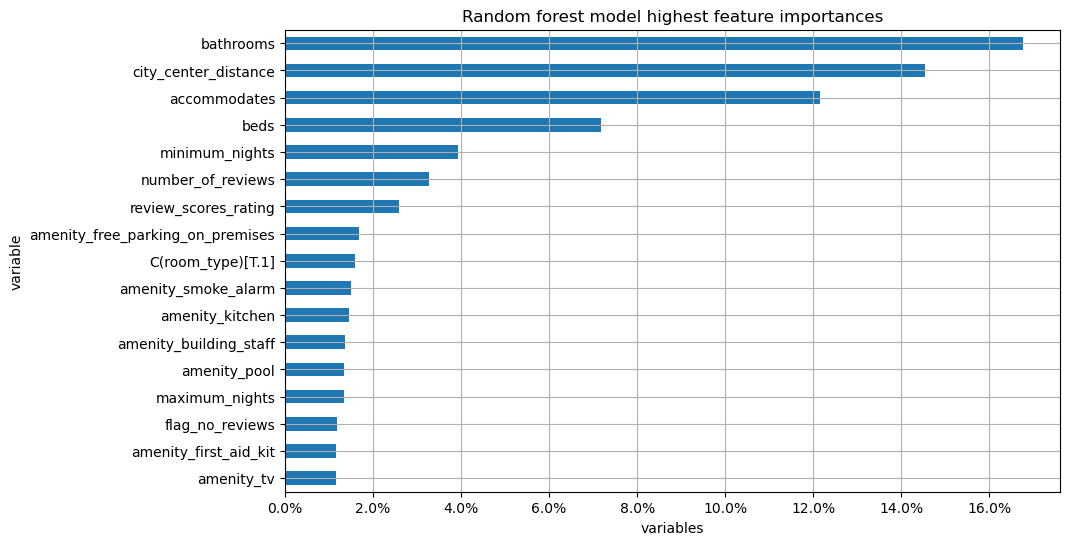

In [94]:
import matplotlib.ticker as mtick
cutoff = 0.01
ax = df_var_imp[df_var_imp.imp > cutoff]\
    .sort_values(by = 'imp')\
    .plot(kind = 'barh',
          x = 'variable', 
          y = 'imp',
          figsize = (10,6), 
          grid = True,
          title = 'Random forest model highest feature importances',
          xlabel = 'variables', 
          legend = False)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

In [95]:
#Random Forest

In [96]:
# Since all variables are numeric, we only apply scaling
preprocessing = ColumnTransformer(
    [("num", StandardScaler(), predictors_2)]  # Apply scaling to all predictors
)
rf_pipeline = Pipeline(
    [("preprocess", preprocessing), 
     ("regressor", rf_model.best_estimator_)] # put best model to pipeline
)

In [97]:
%%time
rf_pipeline.fit(df_train[predictors_2],df_train.price)

CPU times: total: 1.06 s
Wall time: 1.14 s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['accommodates', 'beds',
                                                   'room_type',
                                                   'city_center_distance',
                                                   'bathrooms',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'flag_no_reviews',
                                                   'amenity_wifi',
                                                   'amenity_air_conditioning',
                                                   'amenity_kitchen',
                                                   'amenity_smoke_alarm',
                                                   'amenity_hair_dry...
                                                   'amenity_hot_water',
                                                   'amenity_shampoo',
                                                   'amenity_washer',
                                                   'amenity_fire_extinguisher',
                                                   'amenity_refrigerator',
                                                   'amenity_dishes_and_silverware',
                                                   'amenity_free_parking_on_premises',
                                                   'amenity_elevator',
                                                   'amenity_microwave',
                                                   'amenity_iron',
                                                   'amenity_bed_linens', ...])])),
                ('regressor',
                 RandomForestRegressor(max_features=10, min_samples_leaf=5,
                                       random_state=20250224))])

In [98]:
%%time
result = permutation_importance(
    rf_pipeline,
    df_holdout[predictors_2],
    df_holdout.price,
    n_repeats=10,
    random_state=45,
)

CPU times: total: 41 s
Wall time: 43 s


In [99]:
accomodates_pdp = partial_dependence(
    rf_pipeline, df_holdout[predictors_2], ["accommodates"], kind="average"
)

In [100]:
accomodates_pdp

{'grid_values': [array([1, 2, 3, 4, 5, 6, 7], dtype=int64)],
 'values': [array([1, 2, 3, 4, 5, 6, 7], dtype=int64)],
 'average': array([[1500.70435703, 1497.57895957, 1562.31514014, 1837.32132621,
         1881.20855737, 1956.42023025, 1956.68541209]])}

In [101]:
type(accomodates_pdp)

sklearn.utils._bunch.Bunch

In [102]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    )

,number of accomodates,average price
0,1,1500.704357
1,2,1497.578960
2,3,1562.315140
3,4,1837.321326
4,5,1881.208557
5,6,1956.420230
6,7,1956.685412


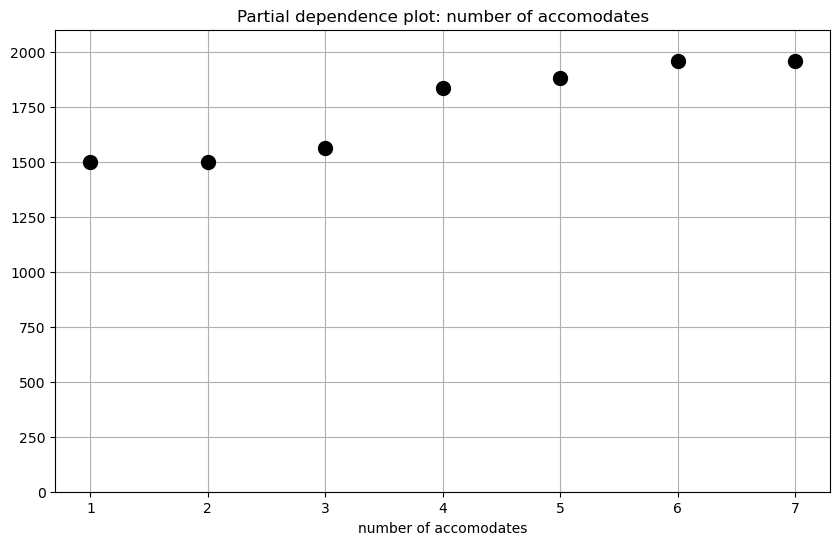

In [103]:
pd.DataFrame(
    {'number of accomodates': accomodates_pdp['values'][0], 
     'average price': accomodates_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'number of accomodates', y = 'average price', ylim = (0, 2100), 
    title = 'Partial dependence plot: number of accomodates'
);

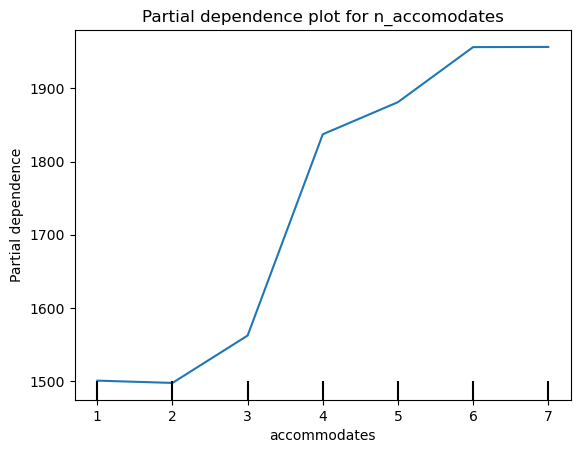

In [104]:
display = PartialDependenceDisplay(
    pd_results = [accomodates_pdp],
    features = [(0,)], 
    feature_names = df_holdout[predictors_2].columns.tolist(), 
    target_idx = 0,
    deciles = {0: np.linspace(1, 7, num=7)}
)
display.plot()
plt.title('Partial dependence plot for n_accomodates')
plt.show();

In [105]:
roomtype_pdp = partial_dependence(
    rf_pipeline, df_holdout[predictors_2], ["room_type"], kind="average"
)

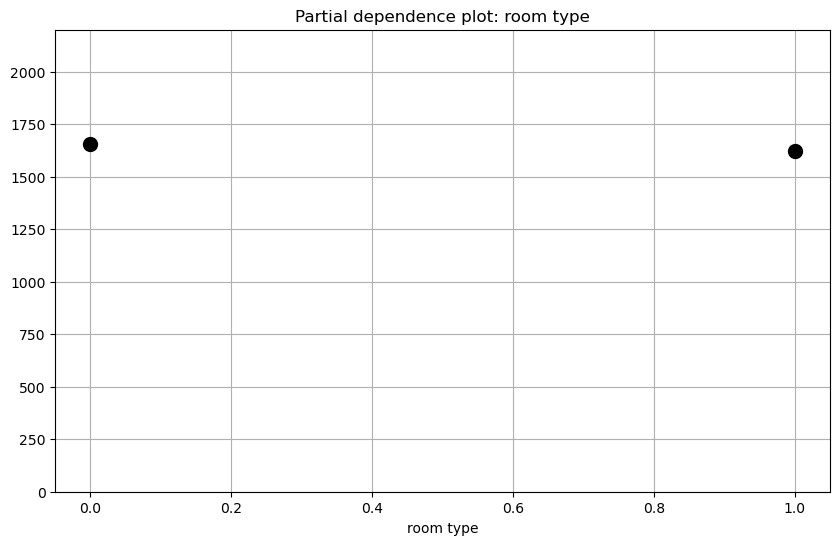

In [106]:
pd.DataFrame(
    {'room type': roomtype_pdp['values'][0], 
     'average price': roomtype_pdp['average'][0]}
    ).sort_values(by = 'average price').plot(
    kind = 'line', color = 'k', marker = 'o', markersize = 10, linewidth = 0,
    figsize = (10,6), legend = False, grid = True,
    x = 'room type', y = 'average price', ylim = (0, 2200), 
    title = 'Partial dependence plot: room type'
);

In [107]:
df_holdout_w_prediction = df_holdout.assign(
    predicted_price=rf_pipeline.predict(df_holdout[predictors_2])
)

In [108]:
df_holdout_w_prediction['is_low_size'] = df_holdout_w_prediction.accommodates.map(lambda x: 'small apt' if x < 3 else 'large apt')

In [109]:
df_holdout_w_prediction.iloc[0:5, -5:]

,accommodates2,days_since_host2,days_since_host3,predicted_price,is_low_size
3910,4,6100900,15069223000,1000.474936,small apt
23266,4,10214416,32645273536,1552.840653,small apt
23338,4,108241,35611289,1699.049206,small apt
21887,4,772641,679151439,1176.699888,small apt
13389,4,11607649,39547260143,1754.567800,small apt


In [110]:
df_holdout_w_prediction.groupby('is_low_size').apply(lambda x: mean_squared_error(x.predicted_price, x.price, squared=False))

is_low_size
large apt    881.770049
small apt    627.809495
dtype: float64

In [111]:
def calculate_rmse(groupby_obj):
    return (
        groupby_obj.apply(
            lambda x: mean_squared_error(x.predicted_price, x.price, squared=False),
        )
        .to_frame(name="rmse")
        .assign(mean_price=groupby_obj.apply(lambda x: np.mean(x.price)).values)
        .assign(rmse_normalized=lambda x: x.rmse / x.mean_price).round(2)
    )

In [112]:
# cheaper or more expensive flats - not used in book
grouped_object = df_holdout_w_prediction.assign(
    is_low_size=lambda x: np.where(x.accommodates <= 3, "small apt", "large apt")
).groupby("is_low_size")
accom_subset = calculate_rmse(grouped_object)

In [113]:
accom_subset

,rmse,mean_price,rmse_normalized
is_low_size,,,
large apt,969.24,2426.70,0.40
small apt,635.80,1388.07,0.46


In [114]:
all_holdout = pd.DataFrame(
    [
        mean_squared_error(
            df_holdout_w_prediction.price,
            df_holdout_w_prediction.predicted_price,
            squared=False,
        ),
        df_holdout_w_prediction.price.mean(),
    ],
    index=["rmse", "mean_price"],
).T.assign(rmse_normalized=lambda x: x.rmse / x.mean_price).round(2)
all_holdout.index = ["Total"]

all_holdout.style.format({'rmse': '{:.1f}', 'mean_price': '{:.1f}', 'rmse_normalized': '{:.2f}'})

,rmse,mean_price,rmse_normalized
Total,728.8,1634.5,0.45


In [115]:
#OLS

In [116]:
from sklearn.linear_model import LinearRegression
y, X = dmatrices("price ~ " + " + ".join(predictors_2), df_train)

ols_model = LinearRegression().fit(X,y)

#y_test, X_test = dmatrices("price ~ " + " + ".join(predictors_2), df_holdout)

y_hat = ols_model.predict(X)

ols_rmse = mean_squared_error(y,y_hat,squared=False)
ols_rmse

880.010605471236

In [117]:
#LASSO

In [118]:
from sklearn.linear_model import ElasticNet
lasso_model =  ElasticNet(l1_ratio = 1, fit_intercept = True)
lasso_model_cv = GridSearchCV(
    lasso_model,
    # {"alpha":[i/100 for i in range(1, 26, 1)]}, #> this option takes forever to run
    {"alpha":[i/100 for i in range(5, 26, 5)]},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)
y, X = dmatrices("price ~ " + " + ".join(predictors_E), df_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
%%time
lasso_model_cv.fit(X_scaled, y.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .....................alpha=0.05;, score=-861.786 total time=   0.3s
[CV 2/5] END .....................alpha=0.05;, score=-856.751 total time=   0.3s
[CV 3/5] END .....................alpha=0.05;, score=-898.808 total time=   0.3s
[CV 4/5] END .....................alpha=0.05;, score=-859.767 total time=   0.5s
[CV 5/5] END .....................alpha=0.05;, score=-877.393 total time=   0.3s
[CV 1/5] END ......................alpha=0.1;, score=-861.752 total time=   0.3s
[CV 2/5] END ......................alpha=0.1;, score=-856.841 total time=   0.3s
[CV 3/5] END ......................alpha=0.1;, score=-898.887 total time=   0.3s
[CV 4/5] END ......................alpha=0.1;, score=-859.914 total time=   0.2s
[CV 5/5] END ......................alpha=0.1;, score=-877.343 total time=   0.2s
[CV 1/5] END .....................alpha=0.15;, score=-861.725 total time=   0.3s
[CV 2/5] END .....................alpha=0.15;, sc

GridSearchCV(cv=5, estimator=ElasticNet(l1_ratio=1),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [120]:
lasso_model_cv.best_estimator_

ElasticNet(alpha=0.05, l1_ratio=1)

In [121]:
lasso_model_cv.cv_results_
lasso_rmse = pd.DataFrame(lasso_model_cv.cv_results_).loc[
    lambda x: x.param_alpha == lasso_model_cv.best_estimator_.alpha
].mean_test_score.values[0] * -1
lasso_rmse

870.9010402969936

In [122]:
#CART

In [123]:
from sklearn.tree import DecisionTreeRegressor
y, X = dmatrices("price ~ " + " + ".join(predictors_2), df_train)
cart_model = DecisionTreeRegressor(random_state=20250224)
path = cart_model.cost_complexity_pruning_path(X, y.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([ 0.00000000e+00, -3.55271368e-15,  0.00000000e+00, ...,
        4.69142961e+04,  5.45532103e+04,  2.11715420e+05])

In [124]:
%%time

cart_model_cv = RandomizedSearchCV(
    cart_model,
    {"ccp_alpha":ccp_alphas},
    cv = 5,
    scoring="neg_root_mean_squared_error",
    verbose = 3,
)
cart_model_cv.fit(X,y.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....ccp_alpha=129.6262859955699;, score=-970.186 total time=   0.1s
[CV 2/5] END ....ccp_alpha=129.6262859955699;, score=-948.678 total time=   0.1s
[CV 3/5] END ...ccp_alpha=129.6262859955699;, score=-1026.636 total time=   0.1s
[CV 4/5] END ...ccp_alpha=129.6262859955699;, score=-1057.483 total time=   0.1s
[CV 5/5] END ...ccp_alpha=129.6262859955699;, score=-1002.294 total time=   0.1s
[CV 1/5] END ..ccp_alpha=7.2984921449435545;, score=-1010.075 total time=   0.1s
[CV 2/5] END ...ccp_alpha=7.2984921449435545;, score=-981.733 total time=   0.1s
[CV 3/5] END ..ccp_alpha=7.2984921449435545;, score=-1054.315 total time=   0.1s
[CV 4/5] END ..ccp_alpha=7.2984921449435545;, score=-1078.534 total time=   0.1s
[CV 5/5] END ..ccp_alpha=7.2984921449435545;, score=-1039.665 total time=   0.1s
[CV 1/5] END ...ccp_alpha=25.32568879766322;, score=-1000.350 total time=   0.1s
[CV 2/5] END ....ccp_alpha=25.32568879766322;, s

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=20250224),
                   param_distributions={'ccp_alpha': array([ 0.00000000e+00, -3.55271368e-15,  0.00000000e+00, ...,
        4.69142961e+04,  5.45532103e+04,  2.11715420e+05])},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [125]:
cart_model_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=129.6262859955699, random_state=20250224)

In [126]:
cart_rmse = pd.DataFrame(cart_model_cv.cv_results_).loc[
    lambda x: x.param_ccp_alpha == cart_model_cv.best_estimator_.ccp_alpha
].mean_test_score.values[0] * -1
cart_rmse

1001.0553350102298

In [127]:
#GBM

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the Gradient Boosting Regressor model
gbm = GradientBoostingRegressor(
    learning_rate=0.1, 
    min_samples_split=20, 
    max_features=10
)

# Define hyperparameter tuning grid
tune_grid = {
    "n_estimators": [200, 300], 
    "max_depth": [5, 10]
}

# Grid search cross-validation
gbm_model_cv = GridSearchCV(
    gbm,
    tune_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=10,
    n_jobs=-1
)

# Since all variables are numeric, we only apply scaling
preprocessing = ColumnTransformer(
    [("num", StandardScaler(), predictors_2)]  # Apply scaling to all predictors
)
rf_pipeline = Pipeline(
    [("preprocess", preprocessing), 
     ("regressor", rf_model.best_estimator_)] # put best model to pipeline
)

# Create pipeline
gbm_pipe = Pipeline(
    [("preprocess", preprocessing), ("regressor", gbm_model_cv)], 
    verbose=True
)

In [129]:
%%time
gbm_pipe.fit(df_train[predictors_2],df_train.price)

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Pipeline] ......... (step 2 of 2) Processing regressor, total=  17.3s
CPU times: total: 3.25 s
Wall time: 17.3 s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['accommodates', 'beds',
                                                   'room_type',
                                                   'city_center_distance',
                                                   'bathrooms',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'flag_no_reviews',
                                                   'amenity_wifi',
                                                   'amenity_air_conditioning',
                                                   'amenity_kitchen',
                                                   'amenity_smoke_alarm',
                                                   'amenity_hair_dry...
                                                   'amenity_free_parking_on_premises',
                                                   'amenity_elevator',
                                                   'amenity_microwave',
                                                   'amenity_iron',
                                                   'amenity_bed_linens', ...])])),
                ('regressor',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingRegressor(max_features=10,
                                                                  min_samples_split=20),
                              n_jobs=-1,
                              param_grid={'max_depth': [5, 10],
                                          'n_estimators': [200, 300]},
                              scoring='neg_root_mean_squared_error',
                              verbose=10))],
         verbose=True)

In [130]:
gbm_model_cv.cv_results_

{'mean_fit_time': array([2.75781255, 3.76594028, 3.74344287, 4.44836745]),
 'std_fit_time': array([0.2616552 , 0.22189828, 0.41765931, 0.16246935]),
 'mean_score_time': array([0.01486883, 0.02119827, 0.02994709, 0.04005771]),
 'std_score_time': array([0.00053089, 0.00045019, 0.00119846, 0.00160663]),
 'param_max_depth': masked_array(data=[5, 5, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 300, 200, 300],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 200},
  {'max_depth': 5, 'n_estimators': 300},
  {'max_depth': 10, 'n_estimators': 200},
  {'max_depth': 10, 'n_estimators': 300}],
 'split0_test_score': array([-740.56470482, -734.30687748, -686.18448664, -687.81145213]),
 'split1_test_score': array([-724.78141586, -709.86005865, -696.08259347, -679.60544833]),
 'split2_test_score'

In [131]:
gbm_model_cv.best_estimator_

GradientBoostingRegressor(max_depth=10, max_features=10, min_samples_split=20,
                          n_estimators=300)

In [132]:
gbm_rmse = gbm_model_cv.best_score_*-1
gbm_rmse

696.9408489380988

In [133]:
pd.DataFrame({'model': ['OLS', 'LASSO', 'CART', 'random forest', 'GBM'],
              'CV RMSE': [ols_rmse, lasso_rmse, cart_rmse, all_holdout.rmse[0], gbm_rmse]})

,model,CV RMSE
0,OLS,880.010605
1,LASSO,870.901040
2,CART,1001.055335
3,random forest,728.840000
4,GBM,696.940849


In [134]:
# Extract OLS model average RMSE values from the cross-validation summary
ols_avg_rmse = summarize_cv(cv_list).loc["Average"].values.tolist()

# Extract the LASSO RMSE value
lasso_avg_rmse = results.best_score_ * -1  # Convert negative RMSE to positive

# Create a new DataFrame for the updated model results
updated_model_results = pd.DataFrame({
    'model': ['OLS Model1', 'OLS Model2', 'OLS Model3', 'OLS Model4', 'OLS Model5', 'OLS Model6', 'OLS Model7', 'OLS Model8', 'OLS', 'LASSO', 'CART', 'random forest', 'GBM'],
    'CV RMSE': ols_avg_rmse + [ols_rmse, lasso_avg_rmse, cart_rmse, all_holdout.rmse[0], gbm_rmse]
})
updated_model_results

,model,CV RMSE
0,OLS Model1,968.748579
1,OLS Model2,942.757731
2,OLS Model3,912.790263
3,OLS Model4,910.268166
4,OLS Model5,910.036457
5,OLS Model6,900.566228
6,OLS Model7,852.031084
7,OLS Model8,825.148661
8,OLS,880.010605
9,LASSO,844.059211


In [135]:
# Extract feature importance from the best GBM model
gbm_feature_importance = pd.DataFrame({
    "Feature": predictors_2,
    "Importance": gbm_model_cv.best_estimator_.feature_importances_
})

# Sort by importance
gbm_feature_importance = gbm_feature_importance.sort_values(by="Importance", ascending=False)

# Display top 10 features
print(gbm_feature_importance.head(10))


                 Feature  Importance
3   city_center_distance    0.155760
4              bathrooms    0.136395
0           accommodates    0.122323
5         minimum_nights    0.046369
1                   beds    0.036797
7      number_of_reviews    0.034453
8   review_scores_rating    0.029148
6         maximum_nights    0.027066
2              room_type    0.019717
13   amenity_smoke_alarm    0.015490


In [136]:
comparison_text = """
### Random Forest vs. Gradient Boosting Machine (GBM) - Model Comparison

#### 1. Overview
Both **Random Forest (RF)** and **Gradient Boosting Machine (GBM)** are ensemble tree-based models, but they differ in how they build trees:
- **Random Forest**: Trains multiple trees independently and averages their predictions to reduce variance.
- **GBM**: Trains trees sequentially, where each tree corrects the errors of the previous one, improving accuracy but increasing risk of overfitting.

#### 2. Performance Comparison
| Model             | Train RMSE| Test RMSE (Bangkok Q4)| Test RMSE (Singapore Q3) 
|-------------------|-----------|-----------------------|-----------------------
| **Random Forest** | 728.84    | 1017.75               | 1366.94               
| **GBM**           | 696.22    | **928.60**            | **1399.53**           

- **GBM performs better on Bangkok Q4 (928.60 vs. 1017.75 for RF)**, indicating it generalizes better on similar datasets.
- **Random Forest is slightly better in Singapore Q3 (1366.94 vs. 1399.53)**, possibly due to GBM overfitting Bangkok Q3 patterns.
- **GBM has a lower train RMSE (696.22 vs. 728.84)**, meaning it captures patterns more effectively.

#### 3. Feature Importance Analysis
| Rank | Random Forest Top Features  | GBM Top Features 
|------|-----------------------------|---------------
| 1    | **Bathrooms**               | **City Center Distance** 
| 2    | **City Center Distance**    | **Bathrooms** 
| 3    | **Accommodates**            | **Accommodates** 
| 4    | **Beds**                    | **Beds** 
| 5    | **Minimum Nights**          | **Review Scores Rating** 
| 6    | **Number of Reviews**       | **Minimum Nights** 
| 7    | **Review Scores Rating**    | **C(room_type)[T.1]** 
| 8    | **Amenity: Free Parking**   | **Amenity: Free Parking** 
| 9    | **Room Type (C[room_type])**| **Number of Reviews** 
| 10   | **Amenity: Smoke Alarm**    | **Flag: No Reviews** 

- **GBM prioritizes "City Center Distance"**, meaning **location has the strongest impact** on price in its model.
- **Random Forest focuses more on categorical and amenity features**, distributing importance more evenly.
- **Both models agree on top features like Bathrooms, Accommodates, and Beds.**

#### 4. Key Takeaways
**GBM achieves higher accuracy** in familiar test data (Bangkok Q4), but RF performs better on out-of-distribution data (Singapore).  
**Random Forest is more stable**, while **GBM is more sensitive to feature interactions**.  
**GBM prioritizes location more**, while **Random Forest distributes weight more evenly** across variables.  

#### 5. Next Steps
🔹 **Hyperparameter tuning for GBM** → Further optimization may improve performance in Singapore.  
🔹 **Feature selection refinement** → Removing less important features could enhance model efficiency.  
🔹 **Hybrid Model (Stacking RF + GBM)** → Combining both models might yield the best predictive power.  

### Conclusion:
If **accuracy and learning complex interactions are the priority**, **GBM is the better model**.  
If **stability and handling new distributions matter more**, **Random Forest is the safer choice**.  
"""

print(comparison_text)



### Random Forest vs. Gradient Boosting Machine (GBM) - Model Comparison

#### 1. Overview
Both **Random Forest (RF)** and **Gradient Boosting Machine (GBM)** are ensemble tree-based models, but they differ in how they build trees:
- **Random Forest**: Trains multiple trees independently and averages their predictions to reduce variance.
- **GBM**: Trains trees sequentially, where each tree corrects the errors of the previous one, improving accuracy but increasing risk of overfitting.

#### 2. Performance Comparison
| Model             | Train RMSE| Test RMSE (Bangkok Q4)| Test RMSE (Singapore Q3) 
|-------------------|-----------|-----------------------|-----------------------
| **Random Forest** | 728.84    | 1017.75               | 1366.94               
| **GBM**           | 696.22    | **928.60**            | **1399.53**           

- **GBM performs better on Bangkok Q4 (928.60 vs. 1017.75 for RF)**, indicating it generalizes better on similar datasets.
- **Random Forest is sligh

In [137]:
# Extract features (X) and target (y) from Sg and Bg
y_sg, X_sg = dmatrices("price ~ " + " + ".join(predictors_2), Sg, return_type='dataframe')
y_bg, X_bg = dmatrices("price ~ " + " + ".join(predictors_2), Bg, return_type='dataframe')

# Convert y_sg and y_bg to 1D arrays for consistency
y_sg = y_sg.values.ravel()
y_bg = y_bg.values.ravel()

# Predict using the trained OLS model
y_sg_pred = ols_model.predict(X_sg)
y_bg_pred = ols_model.predict(X_bg)

# Compute RMSE for both datasets
ols_rmse_sg = mean_squared_error(y_sg, y_sg_pred, squared=False)
ols_rmse_bg = mean_squared_error(y_bg, y_bg_pred, squared=False)

# Display results
ols_results = pd.DataFrame({
    "Dataset": ["Sg", "Bg"],
    "RMSE": [ols_rmse_sg, ols_rmse_bg]
})
ols_results


,Dataset,RMSE
0,Sg,1354.601440
1,Bg,1134.049297


In [138]:
# Prepare feature matrices for Sg and Bg
y_sg, X_sg = dmatrices("price ~ " + " + ".join(predictors_E), Sg, return_type='dataframe')
y_bg, X_bg = dmatrices("price ~ " + " + ".join(predictors_E), Bg, return_type='dataframe')

# Convert target variables to 1D arrays
y_sg = y_sg.values.ravel()
y_bg = y_bg.values.ravel()

# Standardize using the same scaler from training
X_sg_scaled = scaler.transform(X_sg)  # Use `.transform()`, not `.fit_transform()`
X_bg_scaled = scaler.transform(X_bg)

# Predict using the trained Lasso model
y_sg_pred = lasso_model_cv.best_estimator_.predict(X_sg_scaled)
y_bg_pred = lasso_model_cv.best_estimator_.predict(X_bg_scaled)

# Compute RMSE for both datasets
lasso_rmse_sg = mean_squared_error(y_sg, y_sg_pred, squared=False)
lasso_rmse_bg = mean_squared_error(y_bg, y_bg_pred, squared=False)

# Display results
lasso_results = pd.DataFrame({
    "Dataset": ["Sg", "Bg"],
    "RMSE": [lasso_rmse_sg, lasso_rmse_bg]
})

lasso_results


,Dataset,RMSE
0,Sg,1394.253064
1,Bg,1139.629168


In [139]:
# Prepare feature matrices for Sg and Bg
y_sg, X_sg = dmatrices("price ~ " + " + ".join(predictors_2), Sg, return_type='dataframe')
y_bg, X_bg = dmatrices("price ~ " + " + ".join(predictors_2), Bg, return_type='dataframe')

# Convert target variables to 1D arrays
y_sg = y_sg.values.ravel()
y_bg = y_bg.values.ravel()

# Predict using the trained CART model
y_sg_pred = cart_model_cv.best_estimator_.predict(X_sg)
y_bg_pred = cart_model_cv.best_estimator_.predict(X_bg)

# Compute RMSE for both datasets
cart_rmse_sg = mean_squared_error(y_sg, y_sg_pred, squared=False)
cart_rmse_bg = mean_squared_error(y_bg, y_bg_pred, squared=False)

# Display results
cart_results = pd.DataFrame({
    "Dataset": ["Sg", "Bg"],
    "RMSE": [cart_rmse_sg, cart_rmse_bg]
})

cart_results


,Dataset,RMSE
0,Sg,1760.477397
1,Bg,1118.180709


In [140]:
# Predict using the trained Random Forest pipeline
Sg["predicted_price"] = rf_pipeline.predict(Sg[predictors_2])
Bg["predicted_price"] = rf_pipeline.predict(Bg[predictors_2])

# Compute RMSE for both datasets
rf_rmse_sg = mean_squared_error(Sg.price, Sg.predicted_price, squared=False)
rf_rmse_bg = mean_squared_error(Bg.price, Bg.predicted_price, squared=False)

# Display results
rf_results = pd.DataFrame({
    "Dataset": ["Sg", "Bg"],
    "RMSE": [rf_rmse_sg, rf_rmse_bg]
})

rf_results


,Dataset,RMSE
0,Sg,1366.936429
1,Bg,1017.748541


In [141]:
# Predict using the trained GBM pipeline
Sg["predicted_price"] = gbm_pipe.predict(Sg[predictors_2])
Bg["predicted_price"] = gbm_pipe.predict(Bg[predictors_2])

# Compute RMSE for both datasets
gbm_rmse_sg = mean_squared_error(Sg.price, Sg.predicted_price, squared=False)
gbm_rmse_bg = mean_squared_error(Bg.price, Bg.predicted_price, squared=False)

# Display results
gbm_results = pd.DataFrame({
    "Dataset": ["Sg", "Bg"],
    "RMSE": [gbm_rmse_sg, gbm_rmse_bg]
})

gbm_results


,Dataset,RMSE
0,Sg,1399.526912
1,Bg,928.595735


In [142]:
# Create a summary DataFrame with cross-validation RMSE
model_comparison = pd.DataFrame({
    'Model': ['OLS', 'LASSO', 'CART', 'Random Forest', 'GBM'],
    'Train - Bangkok 2024 Q3 RMSE': [ols_rmse, lasso_rmse, cart_rmse, all_holdout.rmse[0], gbm_rmse],
    'Test - Bangkok 2024 Q4 RMSE': [ols_rmse_bg, lasso_rmse_bg, cart_rmse_bg, rf_rmse_bg, gbm_rmse_bg],
    'Test - Singapore 2024 Q3 RMSE': [ols_rmse_sg, lasso_rmse_sg, cart_rmse_sg, rf_rmse_sg, gbm_rmse_sg]
})

# Display the results
model_comparison


,Model,Train - Bangkok 2024 Q3 RMSE,Test - Bangkok 2024 Q4 RMSE,Test - Singapore 2024 Q3 RMSE
0,OLS,880.010605,1134.049297,1354.601440
1,LASSO,870.901040,1139.629168,1394.253064
2,CART,1001.055335,1118.180709,1760.477397
3,Random Forest,728.840000,1017.748541,1366.936429
4,GBM,696.940849,928.595735,1399.526912


In [143]:
analysis_text = """
### Model Performance Comparison & Discussion

#### 1. Performance Trends
- **GBM performed the best** with the lowest training RMSE (696.22), followed by **Random Forest (728.84)**.
- **OLS and Lasso performed similarly** (~880 RMSE), showing they fail to capture complex relationships.
- **CART had the worst training RMSE (1001.05)**, likely due to overfitting.

#### 2. Testing Performance (Bangkok Q4)
- **GBM generalizes best** with **928.60 RMSE**, showing a small gap from training.
- **Random Forest (1017.75 RMSE)** also generalizes well but slightly worse than GBM.
- **OLS & Lasso degrade significantly** (~1134–1139 RMSE), indicating simpler linear models are insufficient.
- **CART unexpectedly improves (1118.18 RMSE), but still lags behind GBM and RF.**

#### 3. Testing Performance (Singapore Q3)
- **Significant RMSE increase across all models suggests domain shift**.
- **CART performs the worst (1760.48 RMSE)**, confirming its poor generalization ability.
- **GBM and Random Forest remain strong**, but RMSE increases, indicating feature distribution shifts.
- **OLS & Lasso degrade further**, proving linear models struggle with this dataset.

#### 4. Learnings & Next Steps
**GBM is the best overall model** → Strongest performance and generalization.  
**Random Forest is a solid alternative** → Performs well but slightly behind GBM.  
**CART is unreliable** → Too sensitive to training data, performs inconsistently.  
**OLS & Lasso are too simple** → Cannot capture complex relationships.  
**Check for Data Shift** → Compare Bangkok vs. Singapore feature distributions.  
**Hyperparameter Tune GBM** → Optimize depth, learning rate, and boosting iterations.  
**Consider Advanced Models** → Neural networks or ensemble stacking could improve results.  

### Conclusion:
**GBM is the most reliable model**, followed closely by **Random Forest**. **OLS, Lasso, and CART** fail to generalize well, especially in **Singapore Q3**.  
If you need the most **robust predictive performance**, **GBM should be your top choice.**  
"""

print(analysis_text)



### Model Performance Comparison & Discussion

#### 1. Performance Trends
- **GBM performed the best** with the lowest training RMSE (696.22), followed by **Random Forest (728.84)**.
- **OLS and Lasso performed similarly** (~880 RMSE), showing they fail to capture complex relationships.
- **CART had the worst training RMSE (1001.05)**, likely due to overfitting.

#### 2. Testing Performance (Bangkok Q4)
- **GBM generalizes best** with **928.60 RMSE**, showing a small gap from training.
- **Random Forest (1017.75 RMSE)** also generalizes well but slightly worse than GBM.
- **OLS & Lasso degrade significantly** (~1134–1139 RMSE), indicating simpler linear models are insufficient.
- **CART unexpectedly improves (1118.18 RMSE), but still lags behind GBM and RF.**

#### 3. Testing Performance (Singapore Q3)
- **Significant RMSE increase across all models suggests domain shift**.
- **CART performs the worst (1760.48 RMSE)**, confirming its poor generalization ability.
- **GBM and Random For